In [1]:
%matplotlib inline

import spiceypy
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (26.0, 26.0)

spiceypy.furnsh('/Users/mcosta/ROSETTA/kernels/mk/ROS_OPS_LOCAL.TM')

In [2]:
et = spiceypy.utc2et('2007-02-24T19:10:32.834')

sensor_name = 'ROS_NAVCAM-A'

sensor_id = spiceypy.bodn2c(sensor_name)
(shape, frame, bsight, vectors, bounds) = spiceypy.getfov(sensor_id, 100)

print(vectors, bounds)

4 [[  6.64563741   6.64563741 152.21012124]
 [ -6.64563741   6.64563741 152.21012124]
 [ -6.64563741  -6.64563741 152.21012124]
 [  6.64563741  -6.64563741 152.21012124]]


In [3]:
nx, ny = (1024, 1024)
x = np.linspace(bounds[0][0], bounds[2][0], nx)
y = np.linspace(bounds[0][1], bounds[2][1], ny)
xv, yv = np.meshgrid(x, y)

phase_matrix = np.zeros((1024, 1024))
emissn_matrix = np.zeros((1024, 1024))
libsight = []
for i, x in enumerate(xv):
    for j, y in enumerate(yv):
        ibsight = [x[i], y[j], bsight[2]]
        libsight.append(ibsight)
        try:
            (spoint, trgepc, srfvec ) = spiceypy.sincpt('ELLIPSOID', 'MARS', et, 'IAU_MARS', 'NONE', 'ROSETTA', frame, ibsight)
            (trgepc, srfvec, phase, solar, emissn) = spiceypy.ilumin('ELLIPSOID', 'MARS', et, 'IAU_MARS', 'NONE', 'ROSETTA', spoint)
            emissn_matrix[i,j] = emissn
            phase_matrix[i,j] = phase
        except:
            pass
            emissn_matrix[i,j] = 0
            phase_matrix[i,j] = math.pi
            

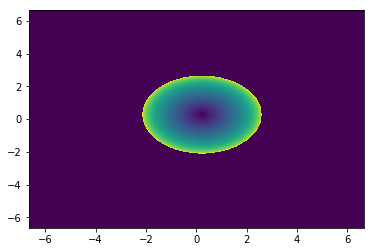

In [4]:
plt.pcolor(xv, yv, emissn_matrix)

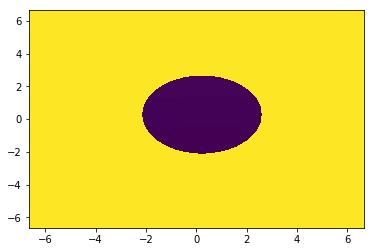

In [5]:
plt.pcolor(xv, yv, phase_matrix)

In [6]:
spiceypy.furnsh('/Users/mcosta/ExoMars2016/kernels/dsk/mars_m129_mol_v01.bds')

In [7]:
nx, ny = (1024, 1024)
x = np.linspace(bounds[0][0], bounds[2][0], nx)
y = np.linspace(bounds[0][1], bounds[2][1], ny)
xv, yv = np.meshgrid(x, y)

phase_matrix = np.zeros((1024, 1024))
emissn_matrix = np.zeros((1024, 1024))
libsight = []
for i, x in enumerate(xv):
    for j, y in enumerate(yv):
        ibsight = [x[i], y[j], bsight[2]]
        libsight.append(ibsight)
        try:
            (spoint, trgepc, srfvec ) = spiceypy.sincpt('DSK/UNPRIORITIZED', 'MARS', et, 'IAU_MARS', 'NONE', 'ROSETTA', frame, ibsight)
            (trgepc, srfvec, phase, solar, emissn) = spiceypy.ilumin('DSK/UNPRIORITIZED', 'MARS', et, 'IAU_MARS', 'NONE', 'ROSETTA', spoint)
            emissn_matrix[i,j] = emissn
            phase_matrix[i,j] = phase
        except:
            pass
            emissn_matrix[i,j] = 0
            phase_matrix[i,j] = math.pi
            

1.558621511478538
1.5409846834149474
1.5403978145601729
1.5229739751214904
1.5232630007042451
1.5232593842990738
1.5066662273082734
1.5069425027629733
1.5075298627868046
1.5075279737643656
1.5077919635280954
1.5077915119039986
1.5076462646922668
1.5079844784490903
1.5079857034620883
1.5057241811435216
1.5060478387420093
1.5060503805059136
1.506016220875266
1.5060187605960587
1.5233993303436484
1.5234033570044818
1.5248962972222349
1.5454865773630047
1.5595378259596644
1.5367832727977673
1.5229852318566741
1.5239530380731106
1.5066132639545722
1.48958323656118
1.4922320844091939
1.492224245297901
1.4702135352897816
1.470206835679574
1.4725772547450589
1.4725707523674687
1.4549414346785796
1.4549364667939932
1.4549314997491103
1.454956438229315
1.4549529979531988
1.4550709580332446
1.455132386451238
1.4551303925774177
1.4551283995456052
1.43758854353476
1.4375880744622116
1.4375876063618662
1.4376926847417095
1.4361280931024931
1.4361291549127155
1.456130900084619
1.456688200109904
1.456

1.555837379631228
1.5112560803066615
1.4955975482924357
1.4713611607937875
1.4588424720359587
1.4509911110627542
1.425118055842822
1.43752691960924
1.4105458416128938
1.3654258832508994
1.3654022331885358
1.3629743218618229
1.3947512178797643
1.3947314713855306
1.350908363768149
1.3508890821778718
1.3508698021108707
1.3396635417143135
1.3396461915708326
1.3396288430510734
1.3387274686561836
1.3259345783316312
1.325918413136764
1.324536000301367
1.3245217275337042
1.3136719918941402
1.3129166039531055
1.3129032861949164
1.3182714393095138
1.3182586282453281
1.31721310227747
1.262075576497545
1.2620640361124698
1.263638059737799
1.3013177329210857
1.301307674822981
1.3000215108914288
1.3000135744495604
1.3000056400007125
1.2774053901501228
1.2773995582578646
1.2773937285450063
1.2770096782946718
1.2712828195389827
1.2712772026706574
1.270228840130082
1.2702254752382514
1.268135974336414
1.2681324179576656
1.2678426899198125
1.2742524679357068
1.274250217310055
1.27343390889649
1.27343420

1.3534318627766586
1.3516033063631105
1.3320598577627007
1.3320346506939416
1.3297677211197032
1.3177779531122864
1.317754762276824
1.3165600031046982
1.3334837211339972
1.3334617458091578
1.33084245583779
1.262309726548442
1.262289561367347
1.261470571928339
1.2614511289216044
1.2614316880975214
1.2523309679794576
1.252311423920467
1.252291882113101
1.248959477012208
1.2489429398155454
1.2543784385581547
1.2525160886867412
1.2315683247410307
1.2315514702195585
1.2283126065881778
1.22829886050495
1.2242762707417894
1.2223551800409784
1.221198472579707
1.2211865388701033
1.220076544339144
1.2200658278922154
1.2242800581476976
1.2242697734991532
1.2219328111225078
1.2219254885286959
1.2004724659179065
1.1984315129247176
1.2093899108279331
1.2093832324625207
1.2044939442173532
1.2044864696035544
1.2044789977490895
1.201876458083697
1.2063033831239485
1.2063002362468545
1.205464719781023
1.1984500034955696
1.1984477845943284
1.197776941442108
1.1977761366543167
1.1973586435567696
1.1973578

1.5114094803756044
1.4803147246432842
1.4545963882131314
1.4329442819218157
1.417200304696884
1.411763298528384
1.38624010568808
1.3848930946279194
1.3742895347704238
1.3615898125414725
1.361558978911346
1.3426755052396606
1.3403851243512241
1.326721967565075
1.333258867434078
1.3095501511969658
1.3095219074181303
1.308770198214073
1.3061801237021813
1.3061535995674112
1.2942726324135825
1.2904879660698134
1.2904638629917669
1.2465546830883407
1.246806347232119
1.2467815986880444
1.2467568523517403
1.2335531810093572
1.2488585881579781
1.24883722708492
1.2485109640688405
1.2201750394776265
1.2201535863203024
1.2180169733805166
1.2179969820558874
1.217976993239514
1.2042244571752523
1.2042055295762237
1.2041866046109937
1.198563850753612
1.198549229536547
1.1985346110585473
1.1731764663852458
1.1877313496821253
1.18771415687183
1.1876969668550796
1.1827924584444738
1.1710450827081065
1.1710304737196737
1.168294150191845
1.1682818789334717
1.1682696106932846
1.1713899823614053
1.16101858

1.5370322281080564
1.490945229542688
1.4698244687950854
1.4449214036312716
1.4275147528808916
1.378167665621638
1.3879965181168818
1.3815510952674983
1.3746520534608702
1.374615998827063
1.353423567391754
1.316182082732813
1.3164221463499381
1.3219006880170467
1.3388793190058885
1.3028874701778475
1.3028546228591469
1.2947769197794465
1.2908849197178076
1.2714791627326674
1.2714480999693725
1.2694686809038613
1.2616317520877571
1.2616016506754864
1.259285897447121
1.2129548587995218
1.2129253484513176
1.2114726450103532
1.2268223370946674
1.2267937905634556
1.2216715747336944
1.221645692217566
1.1981491309038206
1.1949123546807094
1.1943929095223964
1.1943683650480486
1.190820328750588
1.180809352534468
1.1807866812195793
1.1785601833152923
1.1785387833506593
1.1733035436525965
1.1532592601817826
1.1532383324234636
1.1532174076729573
1.1502646527589118
1.1502454877667518
1.1430635529036508
1.1384921496974723
1.1384750718095507
1.1293445325744411
1.1275951273733655
1.1252130921047199
1.

1.4993632022830778
1.4797982865410575
1.4587810435634312
1.4248967432222535
1.4163053830501007
1.4016790289236198
1.3950536996110718
1.3720975895134866
1.3569127570355444
1.3440625718841157
1.3440233110549251
1.3322494787247217
1.3143280386220468
1.311797473785421
1.298697715858927
1.2975081784226994
1.2806056563996124
1.2805699866235776
1.2664586845600956
1.2654823938950586
1.245454316988101
1.245418558665148
1.241131482108128
1.2165763344252343
1.2165420303582914
1.2145091143075102
1.214819364169874
1.2077703506005626
1.2077399450384325
1.19288366697096
1.1898303713897365
1.1898010618060257
1.172803597394631
1.1703002918040026
1.1702717861662792
1.1637649610188887
1.1583600651707882
1.149861628791619
1.1498346890050744
1.1465456381803403
1.1465202201693674
1.146494805119802
1.132385399318054
1.1344230434139666
1.1343992900055426
1.1291785991282943
1.1291574978569012
1.1291363997871924
1.1137811319505675
1.1033352469203779
1.1033123754647949
1.0965723119551571
1.0965529512936991
1.103

1.5335619894186345
1.4940726542470852
1.4443280819986584
1.4305285809367128
1.418047010915925
1.387285574820608
1.3667099356534673
1.361799707687223
1.3508458708438076
1.3477657156818081
1.3378053228386195
1.3355377481091755
1.3050274509203252
1.312010916584832
1.301834387298031
1.3017946987854874
1.279702443284585
1.2579420187514172
1.2592028641517359
1.2532457408953828
1.250604669247264
1.250567316447345
1.2307737922817283
1.2259959395504108
1.2022080317350448
1.2002214406373835
1.2001858010414723
1.1871773192467312
1.1845534580377959
1.1845185124664572
1.166849261435959
1.1620530840003274
1.1620195082806284
1.1619859351761115
1.1473451878326633
1.1473135345110939
1.147281883972642
1.1447653085613458
1.1372810455905056
1.137250206113787
1.131967582728748
1.1319387764781783
1.1319099732138311
1.0988133324522196
1.0987869349265174
1.0987605407228265
1.099237408617612
1.0992108098179403
1.0994724109742153
1.0820046840127895
1.0819789182713608
1.0819531560126012
1.0780748088566083
1.0780

1.5396234943519758
1.48890307327583
1.4507487801461976
1.4377283277754425
1.4129345586197086
1.4040572473755455
1.378739962630647
1.3537915913542897
1.348021173097246
1.3367117472979022
1.3334636865248968
1.31285000131214
1.290689510633288
1.2689513662528324
1.2689060240510033
1.2435228143335142
1.2511230192070661
1.2877967650034163
1.238308871123376
1.2382665071669625
1.2306352747387876
1.2279183989877605
1.2278784876510103
1.195789397469898
1.1957491459080871
1.164903721062162
1.1648645250313967
1.1648253314058066
1.169744114534436
1.1697055745631446
1.1696670369885107
1.1471262725208105
1.1470902100284825
1.1470541501765223
1.1441637209858273
1.124832690913093
1.1247971264355094
1.121237736563792
1.1212033105401187
1.0752885226818518
1.06987435414759
1.069839441900978
1.0656549110662534
1.0656213568071313
1.0835166990783742
1.0746859390939814
1.0746558057779467
1.0744057252020456
1.0703438636260045
1.0703151733772158
1.0577788093050138
1.0539467829397087
1.054903392024153
1.05487595

1.5060522704306671
1.468576230288077
1.4442793943030598
1.3795117073400798
1.409095986338211
1.3982191016628356
1.3701689053248831
1.3560790048846132
1.3429807162394671
1.3184942160402138
1.3046910008883597
1.2462471916950668
1.246199878236394
1.2657744882980455
1.252595387361777
1.2540849345961451
1.2515738156303347
1.2521421751833657
1.2504001695131357
1.2219389515526637
1.2421458840262822
1.2018146195255563
1.19620645590668
1.1961625659479216
1.1642543440422233
1.164211515638376
1.1431035906614475
1.1374351130924922
1.137393284719869
1.1485946693826148
1.1475805648524218
1.1475392808062805
1.1242653366157
1.1131269723332273
1.1079722172686635
1.1019455996632035
1.1075319629853815
1.1074942272823605
1.1036927329067308
1.1036560724391282
1.082016391640268
1.0754733931613956
1.0754380334987461
1.08069346239517
1.0777344958673698
1.0574243264085297
1.057390064308974
1.0536797859532834
1.0536466428353182
1.0646025063875475
1.027219111154147
1.0271880548884642
1.0271570023922059
1.0227260

1.509883955838991
1.453225743234493
1.4447014541635494
1.4205580979357877
1.4201449957751489
1.3822766642525814
1.3669512708614577
1.358135985337394
1.3448222440870057
1.3323415787783444
1.3052739434933598
1.3015030903638811
1.2670679750052924
1.252646414411711
1.2568982038592442
1.2556148496400608
1.2555680933256486
1.2365671643538223
1.2365200700000987
1.2519602628900093
1.218590374237962
1.2185429206208516
1.1829072850680282
1.1828619801831899
1.1828166773559767
1.1683772712910665
1.1683333089621943
1.1494357406282074
1.1493940448578852
1.149352351500613
1.138056210585673
1.13801440641836
1.137972604737401
1.1055760656533642
1.1055346375621395
1.0991758100067939
1.0991360207588685
1.1028007021492219
1.0950227594773627
1.0949851285098124
1.0949475005033722
1.0620063472225254
1.06196832848043
1.0619303129326163
1.056970517471455
1.0569338465471134
1.0532098508812315
1.0395151993519565
1.0394805783231373
1.0394459608144804
1.0348139213614107
1.0347806650737144
1.011982615673127
1.00571

1.4874927961794944
1.4624151620677155
1.4371441103604958
1.3950285537740728
1.381649780777955
1.3630430769751145
1.367446229005079
1.3451557588794631
1.3301701534894004
1.3176424730018335
1.3050128419354268
1.289499462755836
1.2509163022386145
1.2508676441910522
1.2721988510605873
1.2446652890991292
1.244743888070904
1.2490450016321533
1.248998581333145
1.2280435444893194
1.1966991813151284
1.1907241118990315
1.1906766267352877
1.1639036007436647
1.1596549090977029
1.1487539743223487
1.1372244950282302
1.1324612544401291
1.1324163401049572
1.128892309247187
1.1205331615639875
1.120488848341317
1.119142153844075
1.1190981481793016
1.0878617373536947
1.0878204538772704
1.087779173255632
1.0819533660289902
1.0819123607955028
1.0818713584731312
1.0713736621674543
1.059453379684826
1.059414675280649
1.0572293458174358
1.0571911971175902
1.0581997558174958
1.0300861639519125
1.030049294643481
1.0224916363180871
1.0224568224146986
1.0224220121627383
1.0204973347576314
1.0052282533552306
1.005

1.5301040193065831
1.4802074959882126
1.4344928910577253
1.4052626788451732
1.3982082804778204
1.3710361862856608
1.365772070758522
1.3331422930179613
1.3511655885586447
1.3099575065854658
1.3089851441560287
1.278150278729012
1.2869712414093488
1.270260822666904
1.256579295326027
1.2646439083936951
1.2250871621692627
1.2250388809106318
1.2215033405184657
1.2169290232760601
1.2010456759930968
1.2032189892051612
1.1879844209509773
1.1879358884753028
1.1686817648137318
1.168635222836699
1.1395159684521161
1.1394698216935943
1.1394236772237638
1.1296078359205077
1.1295628298414664
1.129517826165791
1.1188761050173224
1.118831968388824
1.11342576900583
1.0868057095865191
1.0867620219590428
1.083077999269195
1.0587131350790033
1.0586695278598288
1.0507768126140937
1.0507349941577055
1.0580392850363447
1.0265405088929684
1.0265000813071001
1.0253327233059046
1.0252925728424667
1.0252524257543865
1.0105489014526736
1.0067924752504152
1.0067545497056152
1.0004979443106752
1.000461635115825
1.00

1.511415199875047
1.453312492403489
1.4300949842468482
1.4152262268382363
1.3863568609201924
1.3938185787471529
1.332446476755599
1.3516977684170066
1.3284288405752047
1.3006831593956854
1.2997397814553595
1.287348640279407
1.2904245281984552
1.260295412249563
1.2543125442203926
1.219227064704347
1.2132556330425868
1.2132042251255022
1.2159625264738256
1.215914028351533
1.1936798156036625
1.1936312638673372
1.2025174214789425
1.193738414849106
1.1546540041618476
1.1546065614178584
1.1407751453850126
1.140728403280377
1.1372975421132228
1.1205441983803377
1.1204977071677442
1.114985346905609
1.0962284886019042
1.0962877125300206
1.0962418125840552
1.092030257479958
1.0787223118809424
1.0786790975380043
1.0751560772322535
1.051818467098457
1.051775751481725
1.0517330389093151
1.0501148935631146
1.0356468876378278
1.0242483857768818
1.0242081054191667
1.0357946233307895
1.0349452561939554
1.008524506694578
1.0084853847838022
1.00273610911967
1.002698377127139
1.003748142604554
0.999801347

1.5359719828265923
1.4869968687261563
1.4547770985016406
1.4304334100686698
1.4058284586387673
1.383145102549766
1.365649061386584
1.3694275526687152
1.33496952253358
1.3077089483635258
1.2956500202104686
1.291043707657053
1.281555075740652
1.28049774007081
1.2804456800872297
1.2421113641211867
1.2127942869503983
1.2127409422908797
1.2057536943978169
1.2006687238919784
1.2006163879071161
1.18470019535721
1.1846502902872822
1.1697325955772704
1.1696826940418787
1.1530776373726686
1.1431381799755187
1.1430897656103118
1.1322339725106585
1.1321866552935458
1.107164047517237
1.0994962560298707
1.0994497075949383
1.0877957368063857
1.083545337113685
1.0834990008172825
1.0861595695007253
1.0629327556928694
1.0628851124681113
1.0492547930850764
1.0585050029203866
1.0502075862433071
1.050164689181473
1.0501771060560419
1.043950305067381
1.0311161941597764
1.0310742331882439
1.0212512937751286
1.0212115206238077
1.021171750896665
0.9966272065826774
0.9965878187654682
0.9965484345895618
0.991845

1.5314061846446747
1.4815888787621176
1.4433251354143752
1.4227423480844303
1.3915571906420336
1.3747607709403937
1.3692496674316208
1.3170550611464515
1.323982497930218
1.3071828181822394
1.2964706156584487
1.2877405338815433
1.2762233213060383
1.2750758889526241
1.2442640559005032
1.2131108176273182
1.2261339274412903
1.2260808526401543
1.2121126891687393
1.2113192280250786
1.194492189582363
1.1783685087768636
1.17261494244729
1.160944581142131
1.1608934935302024
1.155547914144692
1.1392754041518138
1.1325806813836719
1.131593995956179
1.1315446707196815
1.1178236824622536
1.0870801933862217
1.0870325588166485
1.0868157237497338
1.075406170457555
1.0686759380958215
1.0686292478724666
1.0697225346625379
1.0665678268389978
1.06269870929877
1.0626520787656297
1.0488962555912045
1.048850895320716
1.0377973533191862
1.037754207225863
1.025283028915973
1.0124028301155654
0.9984050010167855
0.9983617732506516
0.9940989318727308
0.9940209322708956
0.9939785970039425
0.9848050871657402
0.9920

1.52415731890185
1.4765470515941224
1.4515281268198386
1.4086338148631323
1.3973532123202477
1.3712680214278448
1.3609396025367506
1.3459025709985915
1.3218704921332263
1.2966727065329087
1.2936565720761017
1.2684920768795096
1.260935712468493
1.259769701977688
1.2432490309445814
1.2286752554528153
1.2317982382599568
1.2144664266985103
1.21069952637966
1.2038729033819904
1.184334116702507
1.184280897156316
1.166725552967235
1.1666732137310232
1.1494661680870046
1.1494145973860261
1.1389730090680563
1.1318028750025908
1.1090411568389855
1.099586337286344
1.099536635659459
1.0992405156644502
1.0903113968848928
1.0902633013468817
1.0752910481944802
1.0752437940308244
1.075196542509366
1.070971398995543
1.0728135248439796
1.0727671349914727
1.0663665598702936
1.0663213770708777
1.0396410023107485
1.0414670030985111
1.041421743278705
1.0294260696266464
1.0004230318818228
1.0003790587961328
0.9909543910570096
0.9909123246208409
0.99591081828723
0.9705328549026386
0.9704898802649755
0.9611917

1.514431282576805
1.470829135179154
1.445998218204247
1.4112286934492753
1.3889644541811428
1.3697063432378043
1.3598167911418633
1.3337552183397605
1.3129554329027775
1.3163704323989736
1.2911787047212522
1.2930513134700836
1.2539604913542748
1.2460241782433121
1.2382867788985104
1.235060042641264
1.216473422490922
1.2104863917382642
1.2104311741318243
1.1944435030897185
1.1815265773779142
1.1734077574480675
1.1617622930455755
1.1548178493556112
1.1440285933448777
1.1439754750595141
1.1215402695106866
1.1214876817745358
1.1119810029289303
1.0928649836091768
1.09281336071927
1.0895737228680895
1.102958613583977
1.0869039520650328
1.0868561325085564
1.0711831548821826
1.0750099187913016
1.0749608775879909
1.038837356855209
1.0364793388720115
1.0364327661943225
1.037677168994738
1.0173823293475333
1.0173347515394704
1.0027670062545417
1.002722090734617
0.9875130998787918
0.9730064110271012
0.9729590677538802
0.9642328880353546
0.9641871244321559
0.9641413643487982
0.9799790086405555
0.97

1.3029175251076996
1.3175049720550662
1.335515714984692
1.350251803930816
1.36502301511739
1.3830564194512558
1.396990127880497
1.4275883554408397
1.4579226916577301
1.4382588105656362
1.518007004431315
1.4654711247581471
1.4206308071922615
1.4067274434120087
1.3830546270617645
1.3747312251938977
1.3571834920403998
1.3363553348348112
1.3245308691606432
1.3035726894381465
1.2867000213608806
1.2694937757609934
1.254294356015099
1.2426409981139235
1.2404158755257755
1.2314917274034232
1.2361683644385617
1.20466345822026
1.195788614190755
1.1890466630969312
1.1858582990669142
1.1723479328605635
1.169564072300074
1.147050521136256
1.1469964239673067
1.1344522626087727
1.1343986335238423
1.1166077851881087
1.1045242322406936
1.1044719057381607
1.088290432920558
1.0882382154643233
1.0845090227287602
1.0839204093300552
1.082691987806923
1.0642029566343887
1.064153516310031
1.0641040785774487
1.0546644837701267
1.0192864380383826
1.0181385060317067
1.0180894939885972
1.0180404848653228
0.989888

1.4896787499230186
1.5046770837565402
1.443511225085336
1.402384961363121
1.3877564008642267
1.3756697405443146
1.346580083865916
1.3337662646199875
1.3045161496320479
1.3099354154231335
1.2851724646922646
1.2666116487601509
1.2388585373017957
1.2470454977396104
1.2361022379826194
1.243704091214895
1.1980183808628506
1.1837706630781784
1.1768864595658177
1.1686454912356394
1.1685861256671277
1.171814525253452
1.1740330867432411
1.1510370737724152
1.1254014086218374
1.1243080462637143
1.1242531308976553
1.149503329973966
1.132777876528044
1.086791649039039
1.0819139510562301
1.0818615605143294
1.0782227435916276
1.0802658526040918
1.080213019463317
1.0530435468140171
1.0519676016848236
1.0519148800246219
1.020851855729928
1.0208009089368653
1.0160669014991994
1.0160166913393638
1.0103358197936756
1.0062530478051843
1.01040051652819
1.0103514773766127
0.9947849281795992
0.9754664042871969
0.9725030544085069
0.972456290922064
0.9723233025710942
0.9686682780068924
0.9710240528293628
0.9709

1.2450635420992144
1.2637248038460236
1.2638724864383761
1.2781925426499476
1.2962235365814734
1.3106960690119858
1.3284970879521916
1.345057308114329
1.3603250274358574
1.3869195605614044
1.4032718054902302
1.4333511921975717
1.4612869725936362
1.4856638741466324
1.5471099946023439
1.4768765101165382
1.449814093797303
1.4171986928885332
1.3920398482262948
1.3635347945386187
1.3183331693711613
1.360353021928948
1.3088288507143129
1.3197974944849056
1.286365447079692
1.2715627822361626
1.262137743792355
1.2540971440157884
1.2365380913411874
1.2094419379566972
1.2070456815949555
1.1987801603093482
1.191729642049976
1.1916711180765607
1.1797853666131053
1.1661438595852727
1.1666183378509862
1.1595245737725948
1.1594658474801562
1.1448013146047629
1.144747321154533
1.1056559260035006
1.1056000650264937
1.0867471281935812
1.0652564510763236
1.0652024901191521
1.0670807954384292
1.0691902785470049
1.062723256726877
1.0626700230837212
1.0588762475458826
1.0450607528382376
1.0450093681294121
1

1.4773146392886758
1.4542358690620392
1.4212895567317398
1.3924765382663324
1.3693051454366911
1.3541228092368127
1.3362702434749072
1.3177259120162583
1.305648490862523
1.2766308705769138
1.2741780738602562
1.2596605585038483
1.2404946516291433
1.2262950413551696
1.20688690351537
1.1976562066985708
1.2068814581634086
1.1907030344757255
1.1906435995685054
1.179927034134464
1.1669479744488913
1.1668886708241257
1.1526187023194203
1.1525597914669026
1.1206932609742435
1.1206355570809832
1.1020476545043205
1.1019906202286875
1.101933587876514
1.081914636821676
1.0818582500518947
1.0778608275916828
1.0778057293965704
1.0653835415446888
1.0402278049719607
1.0401733251125518
1.0384972946665394
1.0297361598757815
1.0238824255750265
1.0238285529581799
1.0289288032418409
0.9839812852397983
0.9839287223791111
0.9746280614105082
0.9745768199220246
0.9745255814951901
0.9608016620202419
0.9541587592487557
0.9541061006831412
0.9408017630542075
0.9407510010889681
0.9496369044359257
0.9470646141271117

1.272372638886493
1.290689520583955
1.304665486071623
1.3185124488833555
1.3359226226937644
1.3504464216104697
1.367611040658222
1.3951284278188278
1.4122497532239036
1.438764675088332
1.4817250792476095
1.5175361851200644
1.5032939361386877
1.4605533641119788
1.4451216392358905
1.4040521717189907
1.3769863285280848
1.3637320662262624
1.3469765434526817
1.3192874029496795
1.3062479637513353
1.2861237117297168
1.283020823734619
1.267060907101957
1.257613296967866
1.2412538937808284
1.2320469862808043
1.2213941832474524
1.1939706957845015
1.1947657585977915
1.1867397441800216
1.1696981333066512
1.170373112328059
1.1782816581410238
1.178219991190991
1.1001754319561996
1.1001155273271939
1.1185876400996209
1.1100000518510862
1.1095786129415708
1.0995826485602724
1.0726947413968257
1.066723993713189
1.066666683674079
1.0667984553404806
1.059437337410331
1.0593809325897274
1.017336786876667
1.0138141101912979
1.013758505598327
1.0115372477701778
1.0114804418201404
0.9966690650329708
0.996614

1.5639994345870625
1.4852059242885791
1.4554313485071957
1.4000857872080879
1.3777818041087502
1.3689774333750375
1.368478801485877
1.3256282035878946
1.3161348838386373
1.2615088419040115
1.2794850121482384
1.2704651573771908
1.2519291171968103
1.2402886903311738
1.2465663395097133
1.2123647199759797
1.1941306659850432
1.1813347336670894
1.1783294531930237
1.1727542160311042
1.1726928304928124
1.1656913508533053
1.1607984493305943
1.1427250847376926
1.1296420614389342
1.126034315549887
1.117927845400276
1.100153401230461
1.0900833386214441
1.0768392737950716
1.061785151483014
1.0617271691175638
1.0660341451321114
1.0633939496793772
1.0633364637449831
1.021149470028972
1.02109114984101
1.025262782481224
1.0124828827161887
1.0124261551690827
1.001677940460041
1.001622493850499
0.9921770648300066
0.9805606862342902
0.9779075125994214
0.9671523058155966
0.960094415254509
0.9600403617348753
0.9499025314767164
0.9498497766718372
0.9436612225454686
0.9361704812857105
0.9361183900669178
0.927

1.0345456844271455
1.054394684378074
1.0540878808396266
1.0541471171860617
1.076035596297588
1.0754983119273618
1.0896995743478295
1.0957280584767333
1.1102135838555856
1.1164735611127128
1.1301673453400187
1.1301539111242578
1.1502747468486945
1.1500917042284124
1.1640055849206132
1.1697726950196157
1.1829889344723665
1.1885390615574307
1.203505525070021
1.2171507658271008
1.2230442855972536
1.236195181267014
1.254891675693729
1.2677538282307819
1.2817515022078045
1.299650846833976
1.313372286592769
1.3307276980726561
1.3442919470996695
1.3614677959454637
1.388723408265581
1.4051106780854112
1.4304964537503517
1.4745622476871514
1.5320337211981514
1.5115784667518477
1.4562872880388746
1.504945714912779
1.3836621256563295
1.3730085293675123
1.355037942992842
1.335350249691049
1.3229356010139168
1.293986271540398
1.30929280566833
1.2714969044854296
1.248333030794919
1.2418760845746561
1.2400173507234324
1.2311461000827193
1.2066373994189994
1.1946368491132477
1.1685219502781459
1.170237

1.4873252116900793
1.4562763450026048
1.4938401054954464
1.3651170531515133
1.360921297368792
1.344840425780646
1.338244897274112
1.3097115936800305
1.2925161991125158
1.2704213278925296
1.2294012648631458
1.245079594109523
1.2443060387502543
1.2166150194944172
1.1765551448408573
1.1764890868566622
1.1934848823486406
1.213379893175798
1.1729817174167578
1.1729173042529681
1.138637310860618
1.132142726972864
1.1438786054720758
1.1090396494165502
1.0996222981145984
1.0995591280444161
1.098212340509662
1.0981506358849775
1.0764569638458836
1.0763944404653214
1.0364113858660395
1.039759165665033
1.0396986401541704
1.0391441639849948
1.0390852641212378
1.0323352844567077
1.0018699358334553
0.9915019447367175
0.9914432847945003
0.9876163415407632
0.9783100907995411
0.9782507777376896
0.961964973807441
0.9619073646876594
0.9618497582150631
0.9482662428655148
0.9482095734319446
0.938160942843415
0.938105406937868
0.9380498740008292
0.9139512121093192
0.9138960486771529
0.9138408884065099
0.901

1.1283003047991436
1.1485885095384631
1.1482743227485412
1.1681965620383634
1.181499187879501
1.1815854693902688
1.2007205369959812
1.2140105139021948
1.2198919875986147
1.2334454759368059
1.2465556320945144
1.2649146875736983
1.2776886812447894
1.296704676977121
1.308251559719045
1.325743325644749
1.3404984935424873
1.3698044093224677
1.3832193858979167
1.4104688818264537
1.4367522972865994
1.4759738697152947
1.5299244695288607
1.4907389330878815
1.4610441118670536
1.4081689650560403
1.3637224870177391
1.3655135388292288
1.358924360804755
1.335043212213987
1.3198186242551424
1.308340386331424
1.2916762018988484
1.2567908615194623
1.2434658290706229
1.2557319806835852
1.2258466614033505
1.2206145912349555
1.186273634308844
1.1850627143830892
1.1946618514357015
1.1955693821816396
1.1489020524630877
1.1488377845933075
1.1519412955486772
1.1161332587097408
1.1056676394393514
1.1107453518521766
1.1033062102994966
1.0995760135106099
1.0995121856830434
1.0807225232034785
1.067369514614466
1.

1.3005154222026944
1.3192811969238774
1.3317489525390456
1.3624708685616824
1.3737641024548408
1.4020597916491773
1.4264717921144674
1.4678335162510838
1.535551750652687
1.4799245768406637
1.456707354880113
1.4175461559859384
1.387578712591346
1.3673919343261995
1.353049186171937
1.3489848291335764
1.3177611622486174
1.3031287330057542
1.2843793551541067
1.254388354720861
1.2271976721498887
1.2341944446456257
1.2092675087523876
1.20805404853566
1.2019570403018114
1.1910672587349704
1.1769318692871962
1.169235947522865
1.1623408051792803
1.152329590017149
1.136776777402982
1.1238094519705188
1.111035306862648
1.1109701332997521
1.0829225506017652
1.082856995087353
1.080754837600358
1.079815619826487
1.058654795124136
1.0526482462227424
1.040259382781005
1.0401964726322817
1.031555557520743
1.022224010535716
1.0214936862867314
1.003572446187994
1.0035109524826278
0.993056629675122
0.992996090921211
0.9656247200388781
0.9647961203707498
0.9714475956623585
0.9610942616870655
0.945932434525

1.2816023223698576
1.293516288266181
1.3116064082550263
1.3360757161453587
1.3544455854241058
1.3774949722661236
1.394037927782131
1.42963057328662
1.4567591259310109
1.5187689512131481
1.4875623448027464
1.4404145891198457
1.4178255436525367
1.3922197146443551
1.3493759680032194
1.3547190317416802
1.332963530791195
1.2933058087425742
1.293018139423737
1.2486371393601743
1.2575139035776988
1.2435892198391783
1.2382374768586775
1.2185441358908589
1.2132275953876122
1.1923545630784151
1.1781808503757512
1.1801786945230561
1.166357176264816
1.145675842681079
1.1280766618058689
1.1300976785370347
1.1201184635836454
1.1107114304301007
1.1022265483343034
1.096517687268664
1.085651442650526
1.0781334960756324
1.07806784966609
1.0584005518716808
1.058335068181102
1.0436606710523755
1.0400830991945214
1.0256122518626185
1.0255488881724246
1.0038375578042444
1.0033647923552724
0.9927630660564957
0.9927005198288648
0.987505790167316
0.9740118244926922
0.973950118717043
0.975997227014263
0.9471910

1.4904492903621678
1.453588763477029
1.4160643345261439
1.3876521149677867
1.3645748587106292
1.3500985680592013
1.3518580602086865
1.3032065696421296
1.2936990233026513
1.271881433512116
1.269287791469461
1.2495663259606333
1.230665036746166
1.2247575395019317
1.1982934354812633
1.197005430974926
1.1805359712097772
1.1701780118761496
1.16040298902619
1.15370316895546
1.1308805160536914
1.1308120655189735
1.1184876103924932
1.1184202122316254
1.100061978180167
1.0999950479147225
1.0773879744792285
1.0773211586299696
1.067811023873839
1.0677450557344763
1.0594376431143318
1.0424772650407497
1.025712668369511
1.0256476205428144
1.0004170303536835
1.0003518143891326
1.0014936178940552
0.9896633003519792
0.9895987844437383
0.9796430326849075
0.9795792710591154
0.9473782183010641
0.9433047752762959
0.9432413821201957
0.9220158802957669
0.9219542247606154
0.9282548870985836
0.92819223573428
0.9281295867531358
0.9094919684168176
0.9094308645172152
0.8941358524489168
0.8787280177578025
0.87866

0.7359888527554075
0.7360396560847874
0.7435777073295655
0.7540103681657563
0.7556854276695847
0.76192597694612
0.7611384393579387
0.761191846539911
0.7707664680079503
0.7864598714619839
0.7848976339091098
0.7921328013393227
0.7924420726791929
0.7924978126306765
0.8005383531261542
0.8156706567893703
0.8145300778071461
0.8221279467899429
0.819256012156863
0.8193138965265675
0.8552519683328843
0.8553100083882401
0.8513385031985152
0.8564800042339219
0.8668007768892387
0.8671465899777641
0.8748134359534784
0.8747524220701273
0.8748131161608563
0.8982298393223761
0.8978863421440016
0.906094473898147
0.9059671312055012
0.9201654050079628
0.9280314136077732
0.9313100202915906
0.9427631550342539
0.946456630915672
0.9483004878491924
0.948364259731352
0.9716240543355291
0.9689551918179748
0.9774634735869889
0.9911070290264099
0.9891956899380902
0.9967459318404879
1.0160484712197058
1.020525335719338
1.037260282968629
1.0357247510226972
1.044291771728922
1.0548903548694486
1.05396765017022
1.075

0.7855376097028377
0.785595409197096
0.8074713058014482
0.8075297864556348
0.8087835849320272
0.8181782615518676
0.8133750745428674
0.8277464853040172
0.8272472272549443
0.8273070477448259
0.8534870633033649
0.8617747616398281
0.8657840136894956
0.8613300708534819
0.8695517969606996
0.8702883680353121
0.8829591279962097
0.8912282039393778
0.8935503335854544
0.8936134347496825
0.9141354322098946
0.9141992042883959
0.9133965329026403
0.9228543107695777
0.9384771062885443
0.9437724513481051
0.9433824568974569
0.9569161631808702
0.966555163978102
0.965230843202396
0.9743618291472925
0.9826345173910906
0.9760765435094072
1.009547929471111
1.0096152694106348
1.0035379256305694
1.0414668250480092
1.0299248553472322
1.0422423549328514
1.0501670884001544
1.0492383207492182
1.0653404926858645
1.0787021106020105
1.0847941762721238
1.078775965810992
1.1136189629122786
1.1118844501394924
1.1297513968303623
1.1415707948858493
1.148609095926437
1.1559729833200802
1.1755863122815349
1.1752694214469983

0.7154692080578907
0.7330883355231269
0.7261576286878528
0.7388922872872519
0.7338250756657596
0.7338815016763267
0.7424815907189973
0.7719365276270977
0.7719927712988222
0.7836976490112578
0.783755142196555
0.7880708764930909
0.7791869645599407
0.79273269812335
0.7933207815460246
0.802113188089472
0.8060051553250759
0.8060657770178317
0.8204642693399011
0.8205253945428305
0.8046792540517166
0.8187220024997169
0.828684976308642
0.8617218427374949
0.8696290240144346
0.8569578750546841
0.8570208372812202
0.8641862397326524
0.8786452770607472
0.8869298752092155
0.8855444103640611
0.9015712712510828
0.9116188963127754
0.9085172126588156
0.9085825121751486
0.9317068698590613
0.9317728129547902
0.9302763169555167
0.9388005575170782
0.9518766959264285
0.9613808786331136
0.9618977634034763
0.9704648138129597
0.9796051378901667
0.9831439401601203
0.992875385072853
1.0035459908007462
1.0130178511190755
1.0261584858704227
1.0240491013670536
1.0373549675781155
1.0459553401367672
1.0576170435878047

0.5904192486891676
0.5952367564649355
0.5952776837670011
0.5948107876668115
0.59949491164548
0.6029309155145912
0.6029739986929108
0.6030170896930835
0.6187934839237814
0.6188381640905689
0.6223204671516398
0.6273371538719221
0.6280678029225459
0.6281144438783195
0.6346727112628714
0.634050773161464
0.6340994209627844
0.6579051166929937
0.6579550770953259
0.6557966124025912
0.6612242172705899
0.6612755288460266
0.6694153757161431
0.6734877746422718
0.6789339572955024
0.685231530123878
0.6958472689288169
0.695901586262924
0.6907728977544729
0.690827044336433
0.704288149124231
0.7043443512164941
0.7153839722076166
0.7253609317017263
0.7254179236194782
0.7283775701975497
0.735208829093458
0.7361429051688833
0.7362012661804507
0.745757308579953
0.7458169503927108
0.740066738389595
0.7504157467115015
0.7730763980000163
0.8037098075946516
0.7878953168438986
0.7892556377297583
0.7893167579442119
0.7969134117728552
0.796975820102321
0.8193196367483517
0.819382691418335
0.8162489774071802
0.825

0.5743848572239172
0.5744242555059296
0.5727192639051023
0.577463558723179
0.5794536632094108
0.5794952622273822
0.5851264245769374
0.5815274120849258
0.581571075358588
0.5918808644122978
0.6088282587947226
0.6088735975702223
0.6132442937639643
0.6132916724975491
0.6119910546321331
0.6185856807965249
0.618635004083041
0.6199479030678086
0.6199973003535042
0.6263201839466939
0.6408095361881065
0.6428319255708103
0.6486426176439466
0.6457705721293016
0.6458226504278937
0.6553214027651539
0.6464216673519182
0.6464756819738613
0.6904373249897061
0.690492769136231
0.6800454090933741
0.6881853102144662
0.6867437965493768
0.6868005241389316
0.707126951915431
0.7148362030564462
0.7148944386667369
0.7102314245299249
0.7102902828313707
0.7197656475912273
0.7285886634751555
0.7276707599303004
0.7440332495111568
0.7517163629951494
0.7517773382112944
0.7539979030208744
0.7618630289982385
0.7736430302565303
0.7737048042219159
0.7827142317784409
0.7837208116329443
0.7837839248366639
0.792591494789823

1.5118917374681766
1.449505923703707
1.4095970476672575
1.389576016496164
1.3851288458625128
1.36298829295776
1.3285412557526277
1.315704825445112
1.2768774192550962
1.2701389093679427
1.2531442877282035
1.2475802281528972
1.1842731222299516
1.2587499900059278
1.1513597881749076
1.183104538104707
1.1773943288687119
1.1630939446395496
1.1544815931110917
1.1245755421314274
1.1245015828305536
1.1095535065552735
1.1094795507810777
1.1003400284537055
1.1002670476914143
1.073639011697747
1.059588377719878
1.059516837428176
1.0405906487702206
1.040519378866823
1.0256515328719171
1.0255800471094316
1.0077241278070066
1.00765347918075
0.995000915969659
0.9804383673492394
0.9796762535123014
0.9672227810259477
0.9612892257381813
0.954410502900133
0.9543769646295459
0.9237767852137906
0.929468702940168
0.9227812146846545
0.9204156753557134
0.9203456433726873
0.9024598659543269
0.9023907381740103
0.8847651013599008
0.8846965301518797
0.8817219583130208
0.881653546367788
0.8835135272722718
0.8530750

0.6333351473663736
0.6333882856739179
0.6315811777562927
0.6397572004387312
0.639812159972552
0.6420305538655574
0.642085599019814
0.6505774486322832
0.6569736319197791
0.6670932717858671
0.6713861511269488
0.6733348614276894
0.6733924145693037
0.6808397480603576
0.6808988145307235
0.6950867074274888
0.7112410148892347
0.7113003726005789
0.704103855487403
0.7171237816873361
0.7151112625723842
0.7151725317017946
0.7362278754986256
0.7362897701493556
0.7343114415389697
0.7446790180694167
0.7406064314199797
0.7406697089516274
0.7753362709442385
0.7754001048252938
0.7695794859047098
0.7788607815157212
0.7789257651812107
0.8020546274880863
0.8021201314202606
0.8006008859339705
0.8105374781692499
0.8091439125760537
0.8235660221352994
0.8353822887799716
0.8303216085562068
0.830388693712368
0.8585296743346476
0.8585972716626963
0.8567538267137271
0.8643479453221522
0.880248923122467
0.8916554218311141
0.8917244034840365
0.8890684369561312
0.9094423581496837
0.9095117547844787
0.910696838106808

0.6348793024733966
0.6349368002125105
0.6585857142278385
0.658643982541742
0.6577181295753315
0.667005668857235
0.6671459451265467
0.6672058482963374
0.6757761262471528
0.6899208230323646
0.689981450290392
0.6962865087127623
0.6963483651011266
0.704154041129481
0.7128701886367275
0.7118300007873648
0.7239108676232414
0.7330967724647712
0.7331607430169225
0.7328454653320481
0.7419420068252163
0.7353688052555573
0.7485546598586268
0.768702059723063
0.7695000370331344
0.7695655194046828
0.7772225206240468
0.7887831123922425
0.7883112624702474
0.7981755549999539
0.7975191707477542
0.7975864514177496
0.8195246435965314
0.8195924193231158
0.8215056356857746
0.8327089965640802
0.8406569123748089
0.85443179795916
0.854500992990988
0.8531895193330149
0.8748440272253559
0.8749136267524027
0.8770984006265811
0.8861349798094068
0.8986507929824424
0.9069182761724287
0.9106070253740836
0.9106777374923999
0.9295509932673124
0.9302583895983332
0.9303295721754634
0.9517935477128318
0.9513382675995686
0

0.5945453838533074
0.5893371752235324
0.6080891298493776
0.6049151935422409
0.6125437023313473
0.6121230285066069
0.6121796444880655
0.62038392756133
0.6203858278470835
0.6204440791298534
0.6431971368839721
0.6432562328068885
0.6439447933952207
0.6527456593313188
0.6539269190020033
0.653987579736353
0.6628320011324762
0.662894059037352
0.6757213315997794
0.6849430006663758
0.6850055450684485
0.684404646262306
0.6959781455048235
0.6968197403736852
0.6968839116042956
0.722104701739982
0.7221693475541974
0.721090633418081
0.7294943213703805
0.7315847033840932
0.73165040869259
0.7476572362773819
0.7477237842238627
0.7481486951241554
0.7633783354756853
0.7634460536229359
0.7865304004910503
0.7865981890339342
0.7879441356760329
0.798514104121944
0.7970001902500061
0.8075245678834563
0.8181782699519072
0.8124011903610507
0.8124704976568877
0.8461302398756663
0.8462000903618874
0.8410748117666408
0.8508744867444652
0.8509451163624396
0.8699195815577596
0.869990223578726
0.8796552260688598
0.89

0.5526998632092559
0.5601224722753263
0.5601747871902506
0.5410046793327252
0.5579225099788468
0.5633439832256975
0.5633999571072015
0.5680394280843418
0.5791296480148842
0.5944665194281094
0.5954318754424679
0.5954893889562086
0.5971332956564144
0.6052828829843546
0.605342018885505
0.6057953641128122
0.6152909443927997
0.6138295406988641
0.6290192373036139
0.6404151081353052
0.6404766952033152
0.6378079483686427
0.6469182180407642
0.6480350892805337
0.6480980421894132
0.6589939048879323
0.6729067900180041
0.672970341552363
0.6804198732934067
0.6804849059543869
0.6809396389718942
0.690859218239197
0.7065212385873874
0.706586679371835
0.7174478344275738
0.7175144383945224
0.7137474664618269
0.7251249248761977
0.7427259503721999
0.7427929615996907
0.750884754468615
0.7492906675876012
0.7493588271503472
0.7616022330041533
0.7723422828843242
0.7703582352905648
0.7806904627973235
0.783403489955312
0.7834731385200313
0.8078749075461301
0.8079448050042389
0.8183724711447828
0.8077262942339751

1.5111750602756426
1.3679115728027715
1.4212668115533587
1.3975897913273638
1.3651393768445526
1.3467582311820183
1.3210383595764899
1.3213945676998056
1.2842597559806435
1.2814227189500818
1.2637632860475012
1.2288431665268709
1.2090074416751355
1.2073684097879929
1.188128112250905
1.1745573392176674
1.1747836036021873
1.1700099875000725
1.1286169947328133
1.1285398556374868
1.124411819176988
1.1108500631326976
1.1059126308053477
1.086895425475916
1.081819001420493
1.0633213972366362
1.0632460928663887
1.0471613153607309
1.0470858348704064
1.0340448310852253
1.0195061524366538
0.9934517165210728
0.9933754434526832
0.9912947362929261
0.9714932211591146
0.9714436919212286
0.9713685910510528
0.9529881794307022
0.9442069561100491
0.9282417935944227
0.9281678270617222
0.9227570190316238
0.9227339672861933
0.907915169921827
0.9078417450399023
0.8906866207279489
0.8906132327750366
0.882689675321952
0.8826165640640093
0.8821065895346403
0.854355745503614
0.8542842835119591
0.8460572506008512


0.5076820941144098
0.5116225436049309
0.5187539399615243
0.5188031980094722
0.5317559020718686
0.49641651944240034
0.4964679305207325
0.5615500866086256
0.5616046596918423
0.5616592395425479
0.5484828598234593
0.5485389447020166
0.5516804433219457
0.5590595428148297
0.5569799083718718
0.5570376369587189
0.5570953718055964
0.5838984052499158
0.5839567468919263
0.5830225471637487
0.5923026828065154
0.5914771451880781
0.591537183020511
0.60107814412983
0.6021487342709853
0.6022104233167214
0.6237536749519853
0.6238161000238096
0.626456094732054
0.63456443394553
0.6351411940023282
0.6352048773284696
0.64481257975696
0.658115659874559
0.6589553810329323
0.6690780829285096
0.6691437912615145
0.6694283573485545
0.6799498173516152
0.6794933360382799
0.6908311862029244
0.7013191940540534
0.7013865489032916
0.7042608551845845
0.7150158452556066
0.7134545034094715
0.725105994415756
0.7369795179433516
0.7390449297123365
0.7391137646554194
0.7489031492493741
0.748972964931992
0.7723879308651663
0.7

1.498818233945088
1.4520325206451774
1.4370970421640694
1.3776171288413464
1.3741081559685275
1.344297568757524
1.3102330187660955
1.3076463764197914
1.2797551382427028
1.2635619774693108
1.2453324671115038
1.226352409370401
1.21520697379122
1.1971110590737453
1.1910966877717688
1.1730978592766652
1.1625423694412944
1.1489969475225883
1.143215434768897
1.1332653979468916
1.118713210204361
1.1186361884247271
1.09824251487435
1.0981656553226524
1.0701350992319485
1.051417448805482
1.0513412342773274
1.0267676470232618
1.0266909067797017
1.009930184596441
1.0098538820352816
0.9972559041690973
0.9971798350548913
0.9846829156001636
0.9846071853550558
0.964139992885639
0.964064578240379
0.9424810519730189
0.9425323629583282
0.9292220814720283
0.9291474648891226
0.9198289322916634
0.919754935753303
0.8979623587404939
0.8989759823085889
0.8989016028453608
0.8856648809636255
0.8855909186153612
0.8710012895421275
0.8531961681260739
0.8533825058197433
0.849216244862951
0.8491437509764198
0.835300

0.39086117291911926
0.39120631381171794
0.3912263345999888
0.4079633398380228
0.40914382597433957
0.4091671976198347
0.40913467758873207
0.4114868603462343
0.41151385669734813
0.41150247903442294
0.41454627947925576
0.4145767796813066
0.41442899236502984
0.4144594976079674
0.418205804525791
0.4179954004521393
0.41802928472127177
0.42291849055184016
0.4229556331524679
0.43683108381043095
0.44302308423832515
0.44306242334486146
0.4431017744731513
0.4494169723362296
0.44945923485097017
0.45025639612520296
0.4502987434724928
0.45624757394240856
0.45701893573264696
0.457064086208691
0.46582706880631325
0.46587446388135634
0.478684856872961
0.4821807324228518
0.48222895911951785
0.4848987199619
0.49036961370893295
0.4904198455240119
0.4903400315060724
0.4903902740905407
0.5031901015137766
0.5032450977461443
0.5033001016357295
0.5134965360234617
0.5135525995928015
0.5304764395607237
0.5318788806019483
0.5319358594179744
0.5344286702815921
0.5412329098278963
0.5466029441598292
0.54666160599115

1.4894443893737617
1.4366620697439565
1.4105634540466598
1.3730927741807704
1.3425507012037579
1.3429935424654724
1.3092640393869204
1.2951581558155059
1.2703438047840514
1.248598975875958
1.2504980062903632
1.2237391586578938
1.2121957096015838
1.1936515359133753
1.1935728506111853
1.160881141020805
1.150315488671609
1.1502373091764644
1.137500426317678
1.1276240929702193
1.1255442878428448
1.109855759165772
1.1019104400451516
1.0585964520150555
1.0802657724792197
1.0799567473129812
1.0392492469281849
1.0392242997868495
1.0192254101618128
1.0191485016824162
1.0086404877889383
1.0085738142494662
0.9850466914458053
0.9849694525380414
0.9624075392240463
0.962329759871238
0.9605122115903031
0.9575236060066239
0.928417609241849
0.928341879649191
0.9286460850166182
0.9296621564709051
0.8967499326867937
0.8966744183925875
0.8838008061602797
0.8805898118700708
0.8703609785720491
0.8706093808726486
0.860167086154773
0.8600924623136439
0.857815781440776
0.8494755256896456
0.8531398401363769
0.8

0.44239059518692875
0.44243658438115663
0.449031559800591
0.4447148685964191
0.44476319473358344
0.46185117947199755
0.4733037749544329
0.47335388780196014
0.4629709142952622
0.4743879271995034
0.47444106498875305
0.4595459228685103
0.4709944497813668
0.49117965777639233
0.4912360788866202
0.4935607239737225
0.4953765015195569
0.507652843576246
0.5183547034062913
0.5184125972791821
0.5189921813534648
0.5190501049612686
0.5275071150603863
0.5261197568271043
0.5261793805973785
0.5316720403362983
0.53173346784601
0.5527937565901861
0.569650494400189
0.5697125740821228
0.5631568333739296
0.5730929856230846
0.5747585834830492
0.5748221424103869
0.5846946813445782
0.5847598099028288
0.596789592336203
0.6068667590884212
0.6069322900923521
0.6078525393828249
0.6196590413113133
0.6184187732182259
0.6184857768209971
0.6290480025934876
0.6428457413781804
0.6432640740700707
0.653984168262885
0.6522877202622938
0.6523562036879037
0.6634439780934963
0.6664459209720923
0.6796241737104176
0.6885632387

1.487598226691059
1.4483583214127995
1.394214276962292
1.383622700569296
1.3232562883009895
1.315259071081577
1.3121443321425534
1.296820040861261
1.2770675935827676
1.25560820790347
1.235688084361416
1.2263929376957525
1.204363846492112
1.1906523656797359
1.1724000745965146
1.1630593492456864
1.1539904809019692
1.1472650060433718
1.1287508370073518
1.1287600333015695
1.1205918774032764
1.091608257531016
1.0838210669755457
1.0689293979420051
1.0688911947905104
1.050194279643475
1.0496498932701195
1.0341855247605658
1.020786192136877
1.0158607526042953
0.9983697008351541
0.9982301317693326
0.9884479501970642
0.9883707221936442
0.9715808097003958
0.9715038522913212
0.9546712489519493
0.9555467875231324
0.9154575890950741
0.9153814598311087
0.9096995962352658
0.9110948927230532
0.8958887971404055
0.8947270336404216
0.8899507160843403
0.8898755834079107
0.8924307329506773
0.8664656212369521
0.8655884864114327
0.8494760673048003
0.849401283383619
0.829071432779856
0.8289963313772162
0.82892

0.38916302719534135
0.3892020335160765
0.40598966079667526
0.41094434109358124
0.4109856198982854
0.4110269114351766
0.41614260165295774
0.41618667590840835
0.41813359528058697
0.4181778479087236
0.42450821505161335
0.42189016536803675
0.4219370566123274
0.42992782494361426
0.43004372445213773
0.43009372803984885
0.4532835641661924
0.45333495400469803
0.4533863532958889
0.4621436013178833
0.4621973409371653
0.46486363263513275
0.4649175070775422
0.4721800068448646
0.47007757985318865
0.47013332144604103
0.479819316322309
0.4798773777405988
0.49348472112977837
0.5031770508886158
0.5032358606013744
0.5055747700935166
0.515121686197818
0.5151824536022258
0.5135860860690217
0.5233300554019276
0.5241485119297355
0.5242110043423635
0.542797040796957
0.5428603718408033
0.5429237082166569
0.5586973728103299
0.5587620095098059
0.5583311952736923
0.5583958348209821
0.5706938840530111
0.570760161128169
0.5846602531393185
0.5953211864028367
0.5953877224494187
0.5932443005576002
0.6052696133720711


1.4748291633951967
1.4324700055345747
1.3922905651952597
1.37045580288267
1.3474041457888415
1.3196926836694851
1.300277203433901
1.2810977221761222
1.263159852541302
1.2501967351224479
1.2291174785483552
1.2276779243891827
1.2121133440594165
1.196494581674454
1.1646624900207616
1.1645833169874664
1.1520215632207194
1.130876983243142
1.142994064332744
1.1499949045269702
1.0897709409424408
1.0896675975191268
1.0735571878636396
1.0790307679262305
1.0655656610523294
1.0489900327802368
1.0450749433288595
1.0229034832056634
1.0223698684750855
1.0106997312041153
1.0106218988099398
0.9893369563050978
0.9892585194271537
0.97921753730509
0.9791215949276829
0.9598562260234761
0.9604516856793694
0.9385062069293026
0.9384294115481921
0.922156197773516
0.9220787920811326
0.9018016739323401
0.9035394497771448
0.8934094370934623
0.8933320865647381
0.8769017459598749
0.8681623865881339
0.8597904210365382
0.8597137815494801
0.8572858568606168
0.8510206101456205
0.8509459662122465
0.8182333625736283
0.8

0.3733723987691373
0.3896467884715545
0.3945504233154864
0.3945927807400258
0.3945714057001655
0.40046389509830155
0.4005092514329179
0.39936601659684745
0.4068322563820199
0.40688077943839795
0.40596264009585487
0.4132981191790856
0.41393733756200496
0.4139886018337364
0.4140398766205224
0.4382257266710233
0.4382785295645207
0.43644592412023325
0.4435767039379264
0.4436315291102637
0.4469523758641186
0.45501546606186755
0.4562252568603836
0.4562823801275823
0.46580284925070026
0.46503992953207535
0.4650992263585591
0.4889699229877441
0.48902998054835767
0.48909004493118013
0.4880600951457946
0.4977633272021915
0.500561954182665
0.5006239132396924
0.5094869524701936
0.5108454224162208
0.5109089244906171
0.5334233495625439
0.5334873717730871
0.5340502832030096
0.5455918671514254
0.545657576925496
0.5451792334490427
0.5559028709124059
0.5591785437576696
0.5592456876848734
0.5696599594509208
0.580695060095827
0.5817906008050748
0.5924750023066051
0.5925437571203231
0.5942238955952935
0.60

1.4754454536231232
1.4346063349578213
1.3980208279481303
1.3704696499802067
1.3510806645685733
1.3091966052057002
1.2901708583893603
1.2787251007114349
1.2727599062879025
1.2574636712422083
1.2297258353540048
1.2294275792715015
1.212694257679153
1.2126154677547032
1.167544130722012
1.141666823384167
1.159401233955077
1.1593220142917942
1.1353890915236018
1.117370225101616
1.1121401125393937
1.0929494641407695
1.0770432369486262
1.0729673320095248
1.0599509743435636
1.0595497387987145
1.0408798049143562
1.0351915135210594
1.0162728170572877
1.000271450097876
1.000192601556777
0.9871518155731462
0.9870732645949657
0.9722173023566577
0.9721388680107592
0.9597964594180587
0.9591169589234237
0.9346058865607099
0.9345282787015607
0.9164242326585076
0.9163464289229539
0.8885925266015771
0.8885146906813486
0.8801414840446267
0.8799142826763808
0.8674415234203106
0.8673641185862241
0.8672763521440373
0.8559157406849477
0.8559790091829498
0.8491766638406851
0.8490995948033696
0.7980901939836663


0.34967315865061177
0.3423335395566726
0.34610266753957325
0.34613653376552356
0.34566149008990277
0.345695318350489
0.3499732030252346
0.35001114498190333
0.3500486785152557
0.3546432296083354
0.35468449996451124
0.3723355678681732
0.37896915339061926
0.37901271099190614
0.37905628204097214
0.3783837453111235
0.38491534493170554
0.38363128383330236
0.38367794150221735
0.39078584689794643
0.3919196338401029
0.39196938888332433
0.39954869564250584
0.39882372216035267
0.398876197118133
0.4068013609331905
0.42137138735281066
0.4214251430029072
0.4320558520735268
0.43211182807585224
0.4307521092735015
0.430808045550909
0.4405540339364246
0.4400969349207105
0.440155326091053
0.45101937139852105
0.45107999758458417
0.4511406311298265
0.4742036416175378
0.47426486249881517
0.47516739279245035
0.4850359364634939
0.48509898623923753
0.4844482758964493
0.49454500189944434
0.49507619313498635
0.49514090429607815
0.5063104093029089
0.5093368128959173
0.5223185035556792
0.5187073248424882
0.5300692

1.4768661299110708
1.4278093596780324
1.4050014525375467
1.365370014657939
1.3414201416173224
1.3142588938608588
1.3057374504574788
1.2743435690898017
1.2635508429857236
1.2562459303118805
1.2342906714558692
1.217545232525885
1.2016781140787878
1.1820910313690713
1.170060627238481
1.1578059991717355
1.1576972548269973
1.145758920337944
1.129829734409908
1.129597579709343
1.1033419968770997
1.0815705420036505
1.0812261288119933
1.0684322699427293
1.0637905533065604
1.0473199266331772
1.0335678813225149
1.0334877128261277
1.0114385446118395
1.0113587254526573
0.9953067025497809
0.9952274210544616
0.9836785214669594
0.9837230179874307
0.9601107082672529
0.9546160692496063
0.9424864628219326
0.9424072091893493
0.9257867978783949
0.9257076559420246
0.9106966609116436
0.9090085515612059
0.9006061195568509
0.8964547485073188
0.8737713280598646
0.8736941755985712
0.8605950520575545
0.8605173711128543
0.8439260111295885
0.8438477945910773
0.8304010003612279
0.8284624022611791
0.828384772079216


0.28934747809885675
0.2932974446941696
0.30987660656728916
0.30597637264571603
0.30268621856692474
0.30268307877577827
0.30360275831619804
0.3012793400345198
0.30128073652462034
0.2994165233520627
0.2972936986472512
0.2972997376414798
0.2960811887131637
0.2960868507292928
0.29516681193112315
0.2970903886205369
0.29710072837313284
0.2969871831031988
0.30040829350698406
0.3004249549405206
0.30565740596306157
0.30568055050402054
0.32408144643172393
0.3226906223359179
0.3227163148644284
0.3227420271217986
0.3244683200300707
0.32802323468954114
0.3280543715565114
0.3320519304717441
0.33594321488734935
0.32986664633530577
0.3299014822532748
0.33474350728291297
0.3328190362175116
0.3328577179194003
0.33289641627915356
0.33913319222626576
0.3391758165490735
0.3554047137425663
0.3606614866392644
0.36070634513805816
0.3614097586535448
0.36782850502687214
0.36787653332496795
0.36868628921076646
0.3758084299556575
0.3758594543962142
0.3755712445326957
0.3756222711963865
0.3849868803377658
0.385040

1.481596235073467
1.4362579121890247
1.391776203587434
1.3689490648740594
1.3495425726792303
1.3265135464285003
1.3092829076939205
1.2814053836295136
1.2725095944764864
1.258523495637136
1.25813770130319
1.2116896338414254
1.1902597794134073
1.1854023277635846
1.1852508537531512
1.1664718768973994
1.1508718442770478
1.1435796823729603
1.1436846868146884
1.1271156378436806
1.0921255798029603
1.0920448551144473
1.0759648241193238
1.059316224194302
1.0558670183239232
1.0417633014670884
1.0419153090744973
1.0263333275725894
1.026380454998026
1.0116227109753713
0.999257981002843
0.9991777933565325
0.9648827732303343
0.965367224857472
0.9552214108266619
0.9553777730627788
0.9417416663944586
0.9416620288956183
0.9220013797990282
0.9219222459145583
0.8956093042692341
0.8955296591298068
0.895826547317598
0.8957461955267846
0.877773950444348
0.8669843539545651
0.8543021702725869
0.8537599490444023
0.8536817089649005
0.8344594063569113
0.8359980250859307
0.814162316729431
0.8215596206067564
0.795

0.2858679235157883
0.30155655459217384
0.30157887594652333
0.3081817289832108
0.30821009013437156
0.29923090581536577
0.301890086580951
0.3019207991722762
0.3100156179958127
0.31562886617416813
0.31566653547615736
0.31246161848426474
0.3124988816146356
0.3161362208228597
0.3168167791072895
0.3168570562541807
0.32163395303283904
0.32167791887142966
0.33834737555375316
0.3452785145492607
0.34532471550821553
0.34537093069682634
0.34504166709131806
0.3522537296585438
0.3514007855819813
0.35145031556891876
0.35877134909201597
0.36001464591648896
0.360067189229272
0.368267858661065
0.3675811760216288
0.3676364926013415
0.37645964295343565
0.39311177413815557
0.3931681610442725
0.4026705529562405
0.40272950388755224
0.4027884636694285
0.4007522708957304
0.4107905268775147
0.41085157536868494
0.4109128062413402
0.42049840526217885
0.4228900877902565
0.4229533180894636
0.43282528768028133
0.445803365539541
0.44586719276864356
0.4582503859171691
0.4583161110860371
0.456086023180898
0.46707334155

1.4857956109557993
1.4388811428562933
1.4024041079767133
1.3829553782760673
1.3463898046423743
1.3213979009018189
1.3004679814371787
1.2790068143540927
1.2614548914507404
1.249745245590648
1.223605609270824
1.2301228613709103
1.1832204713183196
1.1831389971185216
1.1825684050926726
1.164299140319633
1.1396792427398343
1.1395981475376906
1.1455560513526981
1.1134916450715384
1.1091718631491296
1.0862233621422344
1.0699420372982151
1.0698608950277595
1.0456865892579046
1.0477546699291778
1.045178005132222
1.0192908292796958
1.0193416393466241
1.0074834316182684
1.0067543899293205
0.989990957378317
0.9899102521299292
0.9648763367948529
0.9647956504102141
0.9500358228475249
0.9499550764300043
0.9302919117070146
0.9302113554797801
0.9105338075645162
0.908776963469739
0.8962713488538213
0.8959924285541273
0.8883146183995064
0.88800442453041
0.8787175665061109
0.8786378318125071
0.8525606087230039
0.8524810529093267
0.8187181598066514
0.8186395731569518
0.7979643918670922
0.8041620002916904
0

0.2644708955060621
0.2644814156380933
0.26460057282861366
0.2606720214629338
0.2606886126643631
0.256738606228426
0.27687746293066723
0.27689808266328464
0.2894937926560825
0.2895238991432285
0.2895540269507047
0.2860882547874456
0.28703299312466696
0.2870638383781082
0.29007073239736897
0.29787614394220413
0.2964329464490869
0.2964721131459985
0.2995670569457174
0.29952260508863904
0.2995641779637725
0.29960576873435424
0.30605068681724346
0.30609628386023063
0.32242123850913074
0.3283053160556868
0.3283530582559721
0.328534283388527
0.3342870549063688
0.33433749329963963
0.3396343987997949
0.34949047197507377
0.3495450273490305
0.3423273827683798
0.3423815656961504
0.3516342160426917
0.35169134393039275
0.3517484826802492
0.3768845735917613
0.3769426873943448
0.377000810973971
0.3858411726300478
0.38590166786054475
0.3875269616744342
0.39683166094074745
0.396894257810001
0.3976298730129898
0.4076388324629951
0.4075165918208207
0.40758114830179026
0.40764571190256893
0.433423788691525

1.4975041697010472
1.4503216714156775
1.4154315360792744
1.3717454991211269
1.3491100283231192
1.335545119712642
1.316302231335773
1.295272450014285
1.2699624693287712
1.2474146129434056
1.2438829568983247
1.2301619855709987
1.2160253812648933
1.1821196768591729
1.1735000039879664
1.1734178161050026
1.1500640438931702
1.1412931337745122
1.1378592405639736
1.1318603949354031
1.1006049141225391
1.083863807535957
1.082888944126095
1.0648395936220925
1.046916400456103
1.0468347304716765
1.0302649975027152
1.0301833552845618
1.0164738789688301
1.0163922703486374
1.0041293038390102
0.9816683507622694
0.9815868218297764
0.965060183789211
0.9649789174451863
0.9438719465051938
0.9437909440752051
0.9261072555425566
0.9247352374757847
0.9092666620235178
0.9091858552228478
0.8943847567801183
0.894304138335713
0.8788650265368103
0.8791798196076623
0.8687701868390693
0.8743814720064059
0.8459399336601835
0.8399498796242073
0.839869761509771
0.827997111489553
0.8279165172435821
0.8018025198767682
0.7

0.2617167442934254
0.26173929153545794
0.2596986750573081
0.2597274649203891
0.2713524385161695
0.27343404520053954
0.2734679371317074
0.2644730476252127
0.26450532591923354
0.2711086747271808
0.2810837468916857
0.2811245732547398
0.28434975493117276
0.2831759436418486
0.28321905793158114
0.2895638455491643
0.2896110504275528
0.30552694040580486
0.31281644344645737
0.31286576033252245
0.31291509212382473
0.31282985033956245
0.3207035091819439
0.3155277258792917
0.31558019913294943
0.3261532183291877
0.3310273597143875
0.3310840108320417
0.3378848980904861
0.33744845699841697
0.33750718643004923
0.34718763939674374
0.3599141729118207
0.3599736949597085
0.36321978345479694
0.37284785379578905
0.3729098175592935
0.3728568253351337
0.3835006210577855
0.38282440624753594
0.3828885942641492
0.3939316237394491
0.3932264316363964
0.3932926218930615
0.4061134866040503
0.41910667128320894
0.419173222405071
0.4310699422754974
0.4311381211035222
0.43328493014386604
0.4453025331424116
0.44537228969

1.516454872645857
1.45663602190182
1.4201987615233858
1.3812044896343911
1.3633092826588247
1.3313170953584244
1.3124899924379096
1.291349218237134
1.2693527541972234
1.2441568855611624
1.2329009919972393
1.2263711541766453
1.2046096457531679
1.1870432897857146
1.1874186881883741
1.167341883028811
1.1559884885658511
1.139761954168005
1.1396798567584805
1.1188543624372291
1.0985378412136404
1.0958340551036934
1.0875937494250478
1.0584109293208102
1.058329101654303
1.0428107183018722
1.0427287341464735
1.0282015420205324
1.0106690074001454
1.0105869695034269
0.9963809925782448
0.996299028272803
0.9832496785103402
0.9831679080039567
0.9590183290272108
0.9594271122848806
0.9362041466030976
0.9372927152273677
0.9262191075665073
0.9259553878070882
0.9090635226535497
0.9077045754201759
0.908340260435948
0.8978962893340764
0.8717186825060552
0.8775446048415613
0.8658939895953389
0.8669699324050226
0.8468798229027593
0.8467993399048493
0.8229621035533734
0.8228817951794853
0.803556524514363
0.8

0.23724055353928986
0.2339457999133721
0.23395170619566208
0.23670089487496965
0.23670804273486837
0.23604522225234256
0.23705303487892265
0.2370658262792535
0.22983101418306265
0.2298485552107095
0.229866125943242
0.24818065409253637
0.2482041349092624
0.24822764218948953
0.24945923032145237
0.24948876141230267
0.2495183175644838
0.24897542520862878
0.25321007886887803
0.2532454914291167
0.25338241921661186
0.2577944528528964
0.2606724761223182
0.26071288455946384
0.2665219459123686
0.26735919036167577
0.2674042043246772
0.26744923737547377
0.27370261781283667
0.289509256916768
0.2894455950440419
0.2968880010697097
0.2969390940727853
0.29699070230605473
0.30531038880715927
0.3053650214465044
0.3052351093201875
0.3143909679340324
0.31444882426642223
0.3144365471464475
0.3144944243420694
0.30498397458509785
0.3050470442339201
0.30511012427533907
0.34558606592262375
0.3456470584756631
0.34570806082689604
0.35845020037555053
0.35851385357441745
0.35867573471323994
0.3683155640163818
0.368

1.4746780658810537
1.4124370174701097
1.4031787235149598
1.3672238594167694
1.345565360412095
1.3155821213858727
1.2977100198729785
1.251669883655475
1.2533571689458225
1.2471855720131624
1.231034423430906
1.2179935131160322
1.2006589589794407
1.1853789612623986
1.1693545374478742
1.1694089724429408
1.1472510527772892
1.1392131931540594
1.1107551361751071
1.1129906269304837
1.1002316918711053
1.0739081789456788
1.0790897281429919
1.0537951666329755
1.0421087296861347
1.04202619269139
1.0260767799621624
1.0259945241906723
1.0089739371151107
1.0088917622161524
0.9892185036736783
0.9858144599451747
0.985732388350179
0.9621510940972573
0.9620686650825837
0.9280448184711485
0.9279627582672025
0.9253300121625253
0.9252481973193409
0.9181248192253771
0.9180434492478344
0.8904109012510183
0.890328500945625
0.8739618064649401
0.8649642483328626
0.8794355034277686
0.8645507594602813
0.8061292765419643
0.8415470150344063
0.8414641929195268
0.8095767999377911
0.8094942144912329
0.7986084772129955


0.21628752728794554
0.21677710243017514
0.2167893848916037
0.2171786906061076
0.22134112596908123
0.22136164244893108
0.23748934986548179
0.23129535965193407
0.23131999519521845
0.22992998279857216
0.23272392742703926
0.23275430088326154
0.23365924297828788
0.23787413082195655
0.23791061424101223
0.23884295972498998
0.2388796556919188
0.24387476991055979
0.24279578080554232
0.24283732286282403
0.25032046254118856
0.25036726862662184
0.2504140945179397
0.25785892535010796
0.27385269263375245
0.2739018096888446
0.28144665212306863
0.28149966256066816
0.2815526883661804
0.2814229348576022
0.2901738709993266
0.2903245095607335
0.2903811036435327
0.3000112740395953
0.29990688271600935
0.2999666968014663
0.3086049031840679
0.3422738362491412
0.34233693452155883
0.3002865746052745
0.30034847569540885
0.30041038782164753
0.3318105358980662
0.34397406551667087
0.3440394829433483
0.3447289512164638
0.35425108812663386
0.35555088168964505
0.35561810106022024
0.3663493634431091
0.37088288858074014

1.5000063604871974
1.4758416143641742
1.4476257177945968
1.405961778956489
1.3721990045348866
1.345822467649478
1.3221713858752429
1.2984800065208555
1.2873495101648884
1.2610763621200856
1.2196320608426163
1.2378702063948586
1.2119209870979877
1.1984327985384287
1.198817229641717
1.183885126709083
1.1669973573421757
1.1540169723134912
1.1372476401603702
1.1384190408482044
1.098735028125435
1.101524005182544
1.102564188295095
1.0652037143254018
1.0536332147406193
1.0494692421169813
1.0399957386488459
1.0392161555281119
1.0239148670352025
1.0072615449633766
1.0071789292704685
0.9915380766137296
0.993262059039007
0.9804198072532175
0.9800738541010587
0.9578652240868659
0.9534061871896238
0.9247521689060223
0.9299216098401402
0.9347913315975647
0.9284192799620793
0.907776468440063
0.9183274654878805
0.8752294313836484
0.8679419733458688
0.8876319000882064
0.8786817373463099
0.8661923488662738
0.8769814175161851
0.7998018234419152
0.7973745965161876
0.8189305862628966
0.8172221184850336
0.

0.18686235459347117
0.20668104459857634
0.20844362429814642
0.2084371596978908
0.19220962428243968
0.19220193452587964
0.19378551079873416
0.18980578967252953
0.18980919194394227
0.1893022274878239
0.1880635441157548
0.1880732201936384
0.19254383141052617
0.19255572318503142
0.19298394555742956
0.19291402065763513
0.1929338372453217
0.19469805928673192
0.19936786898195752
0.19939587524768074
0.20063243226147723
0.22256067298584803
0.22259415492839832
0.2149023693346101
0.21943788073279313
0.21947594917318936
0.22037706063159898
0.22584019198925934
0.225883826934015
0.22647276138045028
0.23326937818585122
0.2333181488257557
0.23377116931550418
0.2415125904193786
0.24216346065410424
0.24221680214469282
0.24227016148378558
0.2513944823376322
0.25145182231256047
0.2660909479582344
0.2752534270409868
0.27531211907025094
0.27532466203107875
0.28486027700767586
0.284921996737658
0.28655214181255856
0.295929067857075
0.295993316853909
0.2951538777282651
0.29521812828264826
0.30518070425319715


1.5012461355302047
1.4520670461158123
1.379099266476212
1.400827218163627
1.3564647311319946
1.3390264362357458
1.3141799101286393
1.2812950920080781
1.2571188462117886
1.2331971353856932
1.2182448785721038
1.208096445132594
1.206061078285129
1.1994896042958922
1.1792234169131517
1.171988612993488
1.1661981092494371
1.1615449207070363
1.1108903478200383
1.1141067132773355
1.1157050710826952
1.0846172268748526
1.0669837472173562
1.063825460305059
1.0572904408789772
1.0388025666617409
1.0376340688408316
1.0223134676322918
1.0222302386485618
1.01298975905447
0.9888538258629046
0.9902440082604179
0.9653455007755924
0.9652623092949645
0.9446890077736987
0.9452558496391655
0.9492658886161308
0.9491828260815595
0.9108416785362985
0.9107593940305275
0.9000348465469327
0.8936297667549985
0.8962484047057485
0.8907845697577814
0.8439478418505539
0.8843064582301096
0.8871576818032703
0.8497841032350001
0.8073008240471885
0.8046272046963795
0.8061598161785728
0.8093107364595159
0.8092282715683261
0

0.19737197246957175
0.19502174246756612
0.19497812056512698
0.18235131127674056
0.18232186845062873
0.18229246028372456
0.1869302286172447
0.1869081254057523
0.18688605798671454
0.18863488956063343
0.18861274663835265
0.1885906391690682
0.20141298527911672
0.20141876867002959
0.20142458744472144
0.17807342992889466
0.1740575553465725
0.17405699099891953
0.17919391967767426
0.177722390282245
0.17114824396467188
0.1711575637516107
0.17111008571352945
0.17671125016138936
0.17673161636272344
0.17675202088072756
0.18046709079352516
0.18049467082536577
0.18052228646121748
0.20384064320479173
0.20387694958788388
0.2039132846982977
0.20333438141112947
0.20337368783543427
0.2052637192438795
0.2116724523098687
0.21171828939136866
0.21059335887881706
0.21063907950430547
0.21806771146690065
0.2182103940352115
0.2182614641598446
0.22666223500363572
0.22676532840506572
0.2268210187664609
0.23620241625798324
0.23626221584851828
0.25088780099454017
0.2603841989324262
0.260444908487509
0.26050563143074

0.9754803636670314
0.9909297919816968
0.996672142421047
1.0093533079159767
1.0061485175987233
1.0283960050228953
1.031415567511416
1.0509355421607554
1.053536922044546
1.0711221144672172
1.091577187674732
1.0940118722893428
1.1130001960073406
1.112034370896235
1.1321246730117145
1.123673161272335
1.1615113964940016
1.1766699050992266
1.1763796602425594
1.19781671458693
1.2159136099576562
1.2267707236273226
1.2455084087163768
1.2638537053749457
1.2876976421188706
1.2995395308576811
1.3196265460760108
1.3450002307492006
1.3732400472085666
1.3978729120295235
1.4366691585326223
1.4801763217243045
1.5668513974319533
1.4646641275079921
1.4103766966677167
1.3788287736996818
1.358001363953732
1.34103349212889
1.3193182312409957
1.300958111076183
1.2815785922943845
1.2592807740807277
1.2180419695859832
1.2222607836323465
1.2102003317791987
1.2004638182951364
1.1814283089024795
1.1813446343261467
1.1687858390628183
1.1529869464506257
1.1183293681900748
1.1084890063153063
1.1197316837778892
1.070

0.20443083558491537
0.18163447021425042
0.2002951847404016
0.20024794902959386
0.19290787994106207
0.19286904727298554
0.19283024403354432
0.1910576876539657
0.18545096308627146
0.18540956710559417
0.18557699554294538
0.17537023303702984
0.17533567864829147
0.17448674767708217
0.15775129382454176
0.14888490736435353
0.14884606382637777
0.14158736224162402
0.15263749291577136
0.15262203981668113
0.15260663235186095
0.1481940462080994
0.14818753890326183
0.14819614071445575
0.16321455928245657
0.16321162235262746
0.163208729446484
0.1627010743753704
0.16271321596494404
0.16272540086917575
0.16356469854725708
0.1639808557811316
0.16004632426047746
0.16006462735695307
0.1627666090503988
0.15910311650844455
0.15913156684087487
0.16407745919021552
0.17029136999187583
0.17033129210140852
0.17544277885573817
0.17191449138506876
0.19079892861337305
0.1908412000842929
0.19334595008020103
0.19339373498052762
0.19650995121131834
0.2051283180896437
0.20518232004042355
0.20236026335174712
0.21148884

1.2732570971556065
1.2903759085642983
1.3105567655254045
1.3231933063145913
1.3475507729651581
1.3763029151552215
1.4077855278408082
1.4465146149134431
1.5076876619364614
1.4906610302925676
1.4418815314885751
1.402076938180595
1.363434857950971
1.3653904129679417
1.3247079133939192
1.3127811933020104
1.270652352857625
1.2563323823949357
1.2372689570630346
1.226678103951353
1.2084030894189448
1.200325319075702
1.2085628540048676
1.1775425728430509
1.1575336616059606
1.1523760570607198
1.1292734295829516
1.133090546909936
1.1015992444104554
1.0767424863189758
1.0737576578097192
1.0720962875701856
1.0554055944400098
1.0553216229622786
1.0382057288711606
1.0380955340809006
1.0277116453869244
1.006431101216574
1.0101277844393988
0.9975268834869518
0.9955796702818659
0.9567620361515271
0.9564685826387027
0.9567318397594284
0.9716188871787377
0.9317582852547422
0.9039324864004754
0.9041406571265326
0.9030575954323877
0.903790706301519
0.9066681937313652
0.887318811471678
0.8872352629449651
0.

0.13378449016720917
0.14045782877472635
0.14466783297278346
0.14470817231468322
0.14759973101010704
0.14764086428442774
0.15383338093789006
0.15792856353518317
0.1579777519464043
0.16538979822336125
0.1614006163739423
0.16145525489748513
0.17380437544386515
0.18640993996675684
0.1864670325330244
0.18878709512567185
0.19785814667783702
0.1979196651326068
0.1971073567260725
0.20749344307419326
0.20755869856701387
0.20905755619356045
0.22037018750779536
0.22025072045080274
0.2203191853098121
0.23381477584742041
0.22911222288309022
0.2291836471861124
0.22925508071176431
0.24408570001145685
0.2559248307532224
0.25599595611991455
0.26906296229533055
0.2691360561576917
0.27108649919106165
0.28281078890658184
0.2828854169117578
0.28042508740080774
0.2928159043353473
0.2928919567859944
0.29421306990884616
0.3086327374905272
0.30759485455710966
0.30767224529553383
0.30774963998623184
0.33029751944995434
0.33037420458318806
0.3324966437954161
0.34571325078533993
0.3457909422907043
0.3478945458840

1.5242953145201394
1.454822049667621
1.4279216623068738
1.3933418918218596
1.3387622906119374
1.3459144793799147
1.3187807183626412
1.3009227703659378
1.2561451496313725
1.254008374049617
1.2366618064109247
1.2266021208839832
1.2202793337394178
1.1991695815712204
1.174838288916493
1.1659454338784039
1.1607486001548304
1.1709034943598526
1.110492144285788
1.0970160558475701
1.1037765986581312
1.0814042876381162
1.0699509979413144
1.0668079115244335
1.0558126256084956
1.0405603693923187
1.0398683275393101
1.0239743153472471
1.0230922835300809
1.0054023952311393
0.9893000035719752
0.982258290851185
0.9637989929618451
0.9717732812206998
0.971646417275248
0.9715618186782686
0.9246959334331304
0.9246119297146469
0.910733815785329
0.9465019189175291
0.8923127848224007
0.8716879259662913
0.8819074958177342
0.8645147504038108
0.8802564204969995
0.8801722178213073
0.8482419724920885
0.8481578648985733
0.8339338782046838
0.8338498707843426
0.8338095069705564
0.8178494078305103
0.8184818879460319


0.10886571160979366
0.10886930340911255
0.10887296149540719
0.1180639250595801
0.11807300381848884
0.11808214306701907
0.12000258306384215
0.12002258011254723
0.1200426340234266
0.12316202361871004
0.12565929504237772
0.1256914760118255
0.12273337514800049
0.12727763952918308
0.13280716550420202
0.132849832680044
0.14037759924274593
0.14065828251584034
0.14070985828988664
0.14076146651566565
0.15066203421464885
0.15072081378977448
0.1653049846412276
0.16959836191471198
0.1696581086795972
0.17374283492204967
0.1845846375106681
0.18464931940416662
0.18443159864910097
0.19609653072343744
0.19616494090478104
0.19422460088078394
0.1942930238851287
0.20800608951835595
0.20630398445843873
0.20637572381819935
0.22242023985675677
0.22249415143242204
0.22256807092139258
0.23163867580514425
0.24118328599064964
0.24125684138958917
0.2570118299173867
0.2570871331216544
0.25716244233648744
0.2578345178340594
0.27036916589204096
0.2718047317435547
0.27188141500028334
0.2817192825066144
0.284487275188

1.499422825165401
1.4488825945654151
1.4156862391970033
1.3830367635727538
1.346612126283091
1.3078642710545547
1.31729854842996
1.291317028048497
1.2836748481256777
1.2182730181179482
1.224828527518393
1.2196086511582092
1.2213677568163304
1.1574359126160088
1.1734837763200745
1.1626044467278775
1.1510264515343023
1.1284771987482658
1.127758433520354
1.1183299825022166
1.09520781370442
1.0961918248782727
1.0724690389908025
1.0612115351216933
1.058838760881683
1.041554123734759
1.019076446976978
1.0165703062606655
1.0051639371843457
1.0056466033139684
0.9998475884882416
0.9878479231012827
0.9678255261557352
0.9642805776295966
0.9520946221528672
0.9605961586095353
0.940538229712471
0.8974797624074502
0.8936826598337915
0.9002997179350294
0.9209587558473635
0.8685618794105674
0.8684778550592459
0.8820418709664664
0.8646730647493746
0.8654558704469113
0.8474260009943947
0.8473416289633723
0.8368071501897083
0.8367227029007923
0.8158158427664812
0.81573163187464
0.7957610540846054
0.795676

0.1093413038008865
0.11375792587679305
0.11380198882743836
0.11410914629390134
0.11415337516303291
0.12482066118539055
0.12487656699420303
0.12493250571315982
0.13675052836716584
0.13681328891656586
0.15008789005221623
0.15887577761263566
0.1589390601546832
0.15900236298307957
0.15683620308329177
0.17026626580476606
0.17033466246034407
0.17078692152248295
0.18429161824209325
0.18228303092041334
0.18235509286288878
0.19495516668590543
0.19681634756554706
0.19689087735584662
0.2081159464576807
0.20923876648617426
0.2093149938140144
0.21857053359950904
0.23358950298037112
0.23366508544602027
0.23167214882760867
0.2468661036388827
0.24694350436477888
0.2469026362203305
0.256833439577643
0.25691178606027054
0.26279950545259273
0.27475543800537394
0.27318527595755404
0.2732644696031925
0.27334366673177807
0.286622952083587
0.2867034234982205
0.2975120129326103
0.3183876304187868
0.31846722055397697
0.30507408895474614
0.3270865883232094
0.327167653637316
0.3274601095506234
0.3432488656854629

1.480500797883455
1.4340052458273227
1.3559978455428174
1.3607955539318028
1.3669912268237756
1.310674532611116
1.3143263799696956
1.2852314408130114
1.2552793825139101
1.230652485225181
1.2384916579978005
1.2180562342257955
1.2129538870878254
1.1832083323915725
1.1611391878403674
1.1580644075511302
1.1443186775568817
1.131182847780801
1.1220082872513386
1.1177970823411931
1.0965399008614591
1.0822006816627088
1.076066652581479
1.0678103752080375
1.0349901061546893
1.031402519199659
1.0128418578665674
1.0128067243095706
1.0097986122359044
0.9926272428137084
1.0014998033355398
0.9680219636101667
0.9629826360410135
0.9459637919392015
0.9509891078131865
0.9368480590177946
0.9367632160449779
0.9146840599220174
0.8988190105339109
0.90100824725254
0.9021608243673355
0.8857413797631484
0.880100400858332
0.8659686518906136
0.8653566185218291
0.850731158496345
0.8506465989666185
0.8331216650839717
0.8330371108507336
0.8343809128003646
0.7894460285234125
0.7893618236518394
0.8027806539796086
0.8

0.09914644102582186
0.11005748313219786
0.11011825581523255
0.11017906072557433
0.134489335800226
0.13455206155712449
0.13670347726774051
0.14915470288477767
0.14922309044571197
0.142791770754839
0.15613928861498114
0.15621178938736405
0.1568539788608891
0.1700992361783341
0.17017459565339838
0.1730036296953411
0.17307892460977872
0.18593407555618563
0.1860110942649073
0.18608812000317004
0.19960433204147549
0.19968275000053753
0.2081546287825459
0.224025969506942
0.22410399585727284
0.22418202731663092
0.23830743024789877
0.23838692537996922
0.23683155310389742
0.23691110955015568
0.2442939272383794
0.2489805435157707
0.24906050125194287
0.2891273693017515
0.2530905730718494
0.2531737225999358
0.2812891928673607
0.28137121609782784
0.28145324112305226
0.3065231556273439
0.3066046302207884
0.3066861067293041
0.32193666422953165
0.3220187421365504
0.3200147637689311
0.320096898974743
0.33642780256405475
0.33645229462215
0.33653495274138884
0.35287630799185027
0.3529004859612988
0.352983

1.4424206890870142
1.4040793195359338
1.377728168036646
1.3714760413059586
1.3533288135891932
1.333061792397715
1.2742770595971968
1.2502345192970978
1.2922832611301862
1.2290231993640381
1.2219848118890688
1.2161345382243212
1.1915182284270647
1.1877573279043152
1.1657193188523984
1.1603292578410709
1.1359566564259824
1.1339926528797408
1.1166195528690772
1.10277541545154
1.1031626729316006
1.0781075947460985
1.0589188352392511
1.0628125042650127
1.037764626465831
1.019731788576976
1.0185015592379199
1.0143085759617874
1.0097510908863039
0.9956650208540533
0.9950311914005494
0.9668636532482744
0.96677879861062
0.9611804545250157
0.9194961034309245
0.9194112594003476
0.9088101810880916
0.9130724584974595
0.9332263630971243
0.9145264049524118
0.8888820710086567
0.8887973143121918
0.886020172169841
0.8683924877141789
0.8647872294399837
0.8355083724376436
0.8354239388123826
0.8464549683796107
0.8480565366471094
0.8135158074637503
0.8095209044298546
0.7967138802835195
0.8029508640258666
0.

0.08503262450889645
0.08509919980545468
0.09908368488318259
0.11967735597552508
0.11974417218779894
0.11981101160785736
0.14005228950734958
0.14012537476871834
0.14019847360968032
0.13558071259684207
0.1469720150746428
0.14614870514937506
0.1462246509016674
0.16061573681386887
0.16076411065838875
0.16084243756865144
0.1760971193153167
0.17344766502389744
0.17352786919147803
0.18999786513846875
0.18563293255784202
0.19784075079261318
0.19966146670601992
0.21540283416354314
0.215482772718506
0.2161084066680143
0.2347494261976598
0.23483062980362027
0.22967461173411124
0.24275734010150024
0.23314101246893204
0.23322341596691334
0.252492289089717
0.2895798274818318
0.2896618308978485
0.2817077548731148
0.2511964406960042
0.25127907894078566
0.24918212022006497
0.29958379514826045
0.2996664896005361
0.29875147046412137
0.31547814788803036
0.3155613400777137
0.31413543754873724
0.3309272827401015
0.32888508879202516
0.3289687441242364
0.3453803770493943
0.3458335196483698
0.3459174596389633


1.543077404137202
1.4561186816524294
1.4135007103496309
1.3853125820323684
1.3798264077615345
1.3483209462724277
1.2983582390879698
1.284259461189602
1.2233649017763952
1.2467405840217454
1.2276784709702928
1.2261040752021797
1.2150792848848948
1.2037447044188543
1.1679519756695613
1.156199714042361
1.1579160101738069
1.1427889600205008
1.1109998154804102
1.1228827625067692
1.1052021853359
1.0957036601759713
1.0864429122675086
1.063243670473577
1.0435391735817754
1.0421424006739433
1.031845247996704
1.0271462861747789
1.0081126997690428
0.9876364286195074
0.9947932551586537
0.96991226231392
0.966033619753659
0.9519850589772244
0.953685625617051
0.9408991707685895
0.9300141409312339
0.9299509870119166
0.9284217441294788
0.9253919621868643
0.9281476043586334
0.875228464698875
0.8962511769367965
0.8701059192625281
0.8669237400578411
0.8377370649718521
0.8559850679958045
0.838402616444089
0.8343668012544578
0.8342818069788092
0.8038155194730096
0.8031978602159319
0.808248573797312
0.797871

0.22222812493563573
0.22214680047163657
0.22737797235019006
0.19745057288798298
0.19736887369937645
0.20670496022778947
0.2068725395757749
0.20678958443266454
0.1901083770610868
0.19002802742728755
0.1720218251257798
0.1719389640219661
0.17185610512299637
0.14826768734636717
0.1481848112884921
0.1510708209766403
0.1396303064553124
0.13956015238105293
0.13949001490878274
0.1126934126762778
0.11262217022168419
0.11255094704067886
0.11495878110197842
0.09518959231097035
0.10347455561884863
0.10339699579005053
0.041425996082002786
0.04203110393315824
0.04199610665282179
0.061608005564702764
0.06152572736715446
0.0614647760629976
0.07661028321704337
0.07512708811617838
0.06541170797820414
0.06533184757456202
0.03905647333725412
0.03899652750034686
0.043094282050638776
0.041991861391042176
0.04198727071805659
0.04686705400649564
0.0468048712644781
0.04681554897072532
0.06234218070982681
0.062372968657249755
0.07548423596210584
0.06013163488062421
0.060190112014568614
0.06846480241217867
0.07

1.1384378685319245
1.1535993818081385
1.157316843715649
1.175200103417229
1.1968848097812077
1.2167908337049211
1.2144692957971355
1.235780732578694
1.2554816605332257
1.2748265359640043
1.2975241632744559
1.3162272020703973
1.337511922537359
1.36090239760974
1.3842078136072618
1.4152725572059968
1.458872566532665
1.532473900336523
1.508317657558975
1.4506331844562796
1.4142836615385252
1.391437430045901
1.2711247519384545
1.3375344340607376
1.3254761774365043
1.281494921624504
1.2717889687249304
1.248222021037049
1.244389114014627
1.2184276162165861
1.2040470901203
1.1989404779300097
1.1793244390041917
1.1572104327901478
1.1510749607677457
1.1451811860575258
1.1265337581166317
1.0956287834610816
1.1326760969020717
1.0843835002710438
1.0485116539299228
1.082341076046626
1.035604733420909
1.0824869353723265
1.0304856945545253
1.0023792549417756
1.0065481259863638
0.999556515372488
0.9928818509642905
0.9595295395111043
0.9753094603308722
0.9528285852452838
0.9445877786046534
0.9402926765

0.18323945633296754
0.20748409431922785
0.17210280948587636
0.15125532907733105
0.1511710577520551
0.13723237618037745
0.14669668642342162
0.14661179123886284
0.143189668604678
0.1318240416047744
0.13173990175579073
0.13165576320809383
0.10305001496329523
0.1029689391529439
0.10288786993342884
0.08996671023092692
0.08988583707737909
0.08752047978308643
0.07231117136185933
0.0722326332396207
0.06364196071727551
0.06361262698502897
0.07831833965387436
0.07855309116076968
0.07850992075531668
0.06641925132373175
0.07098169164630122
0.07090530752623968
0.027841006444442873
0.029484708648399055
0.029414996892811674
0.02626474036836997
0.03422327385736477
0.034218767686401766
0.03299182773997386
0.032367501607839064
0.032365068844611114
0.03619667963201959
0.059380261271886475
0.059455620864502755
0.0555586978037755
0.05439857919639461
0.05447371480272973
0.05971731209870104
0.05979206122263444
0.07230062971585462
0.07238084891407841
0.0724610794581114
0.08913062845554678
0.08921338379467672


0.9618691904013678
0.962128300638747
0.9781927021341981
0.9949391756438201
0.997978007188458
1.0155757898317581
1.0155685386021627
1.0345858038456142
1.0348776284676586
1.0508562563550623
1.0549787460633409
1.0705793363348057
1.0903468167596448
1.0902458565320907
1.1062363082040356
1.1271867008113283
1.1270496142975595
1.1451944963351497
1.1658268514299106
1.1648101201465109
1.1841500262009963
1.2043686030362397
1.223755825578435
1.2413921550508225
1.2455803152958556
1.2646223943454102
1.285523355287315
1.3043804858112829
1.3232101479366727
1.3508233905366092
1.3861331071335141
1.4139155665598435
1.4557562219530702
1.5169101462971097
1.5052005073882246
1.444659211932303
1.4158006531036358
1.370521036457466
1.3635426524617527
1.3240741846810606
1.3262694944622844
1.2822658949464054
1.260791809545424
1.2538834649245008
1.2186172929310297
1.2153351186713761
1.2183743979058028
1.1807134316300376
1.1537201845849325
1.137802254169292
1.133125881638866
1.180753723130788
1.087760981659623
1.13

0.135025940616248
0.1433491435591755
0.14326410549514523
0.12025197167030564
0.11010562815441619
0.11002097156147926
0.05992694651713623
0.09621798190266181
0.09613476942024268
0.08896396181564897
0.06691966104814115
0.06683748053233235
0.07026213040569063
0.05570331008119666
0.05562014541292784
0.05549403014962444
0.034014692638489503
0.033932202783824625
0.0294875161697191
0.023809109419437605
0.023735449525683412
0.022169213665000555
0.02210513744845652
0.0209705311958446
0.020886008332109185
0.020801490938641743
0.02033854786540218
0.020420960249364333
0.03217728516083874
0.02649734191585996
0.02658014033346523
0.026662953868776908
0.05093402152016531
0.044383486201343116
0.04446561008080672
0.048339809958203264
0.07329859142083345
0.07338305088838525
0.06678162379500592
0.0829031473761817
0.08356606319695309
0.08365121123295668
0.10074047953460659
0.10180339398179966
0.10188858887479278
0.10197378376695572
0.11938667719023954
0.12310203866718411
0.12318667431340563
0.1385384685284

1.5037113865079317
1.470360427022512
1.3881572556858188
1.3951065682109611
1.34776792464767
1.3318132034419248
1.2866441464863771
1.3100194615361165
1.2369666734554112
1.2617908154768518
1.2346117068079698
1.220990142914155
1.2074128115537779
1.190661473854887
1.204978163643544
1.1395990314306204
1.118193848917435
1.1611701172063904
1.117338830005047
1.1068185026785302
1.1012206962519584
1.0570729650853918
1.0635448394542621
1.060037017914712
1.0510831795035036
1.0459462682709944
1.0207434370586113
1.0178037487559561
1.0047604281890428
0.9825801045248422
0.9811889627117295
0.9717912106572143
0.9690399090475995
0.9589010167268529
0.9721284203817443
0.9361485633582174
0.9099373991460191
0.9042189255008035
0.9200479860702488
0.8965516682452151
0.8927590345351276
0.890437293630704
0.8859500808962826
0.8688345831876825
0.8590825789588203
0.8596557878696535
0.8595706073103933
0.8388973495472883
0.8540615746519926
0.853976490900058
0.7997214653363237
0.7996362853152235
0.776385104760657
0.795

0.09944133435447652
0.09952524335260812
0.11940124697896261
0.11948642192673634
0.11957159689919512
0.13535849049836673
0.1354436177758951
0.13552874513031554
0.1356727596867493
0.15369768342595802
0.1537827500776785
0.15340194937988666
0.1705192434264084
0.1711072735938273
0.1711922819535967
0.18793524321445781
0.18633067182423035
0.18641557270805748
0.20944858345073153
0.20777179402726895
0.20785656206558456
0.21045186246261124
0.22545938228946333
0.22554455230155548
0.2249510172308715
0.24250746394990233
0.242592599558101
0.24061301454973413
0.26012520034470643
0.2602102714528704
0.2576837926448854
0.27553027662311586
0.27820584006751004
0.2782908731760677
0.2960773470935248
0.29199906673189185
0.2920839848995791
0.29216890317786454
0.3121893531714923
0.3146894296232822
0.31477459573352484
0.3346500802819054
0.33473521434168674
0.33140872891621415
0.3465054445171706
0.3465905243351299
0.3500751003715924
0.3733103652404996
0.3634204524606072
0.36350540330345504
0.3764197608223305
0.3

1.5117721199758478
1.4651239138834136
1.407195021220411
1.3789249482832748
1.3551498802904505
1.3287888776129961
1.3078427776225237
1.2976791644232044
1.2513028374197117
1.2752850197794148
1.2127614144296885
1.2483915211434304
1.2033214900028966
1.193554619137688
1.1791992631697052
1.1881329757686183
1.143889746606879
1.1373066799893652
1.1238361058162236
1.1067551319567634
1.0971320201455834
1.0879095569774466
1.0679204502070798
1.0545660070439036
1.056340045973457
1.0313890719495904
0.9914551858313867
1.0379232425620963
1.0128958382654047
0.9949844102755897
0.9895668154660593
0.9714865637834667
0.9685708501120667
0.9733926985488833
0.9394285049253535
0.9525577122626813
0.9200683089694605
0.9095476378969727
0.8942381032325377
0.9007245216829651
0.9006393701734591
0.8883314760104173
0.89139716924752
0.8771094193403896
0.8686904776990636
0.8519925218772175
0.8514243096920167
0.8394250376990982
0.8080653614149156
0.8004893292552882
0.828151072841135
0.8280659569834407
0.7912584116769791


0.04317755564077019
0.04311998948239544
0.04560645345385469
0.047438266724406826
0.04737566186909349
0.04731312751369849
0.04718431939002509
0.04714535955593355
0.02958416450192693
0.01774014542762484
0.01777888480076258
0.017817947289169304
0.03227162191877952
0.03234849706433821
0.03242541380045745
0.029974975876229527
0.06470698942786324
0.05461603385358803
0.054674196969058377
0.057875514568650296
0.06633324382216176
0.06641110271447892
0.08527238872967983
0.08440466352666395
0.08448383811308727
0.10143503562945022
0.10082138491052435
0.10090135527425496
0.09931808772643795
0.11749358625989116
0.11757747734277288
0.11831951806393656
0.1352968833175877
0.13538086157858248
0.13443960142915304
0.15413676627152337
0.15422064958617832
0.15283375407251712
0.1697971051760949
0.1698808659315935
0.1697949259783037
0.16987867325448322
0.18716362809440085
0.18724737467034847
0.18733112251698777
0.2088762432339706
0.20896007774892195
0.20964208500201
0.22415733547432473
0.22424204890009314
0.2

1.2014777342963123
1.2192762255182454
1.237364751934172
1.2570345130805352
1.2743517777489226
1.293434390402347
1.3127414690994395
1.329979069398984
1.3292467754861927
1.3881637354841516
1.4158383914357895
1.4549327305028716
1.5236923351354836
1.4950736815273604
1.4598841442854027
1.4388334390560578
1.374203792717049
1.3541049615183907
1.3321999188166167
1.3188333123368143
1.278888955448781
1.2719156049958162
1.2557969950577397
1.24562474904647
1.188948710846688
1.189903204076823
1.1959641457406016
1.1809131228555383
1.1535314738726588
1.1490723312846858
1.1412900631681675
1.1163709750474107
1.1072106907375705
1.099610944863597
1.0893897541598156
1.0655339557200811
1.0975761992338033
1.0653375248955796
1.0347193246620656
0.9947722549008702
1.0078982490082846
1.0208957618181616
1.007624515027224
0.9589712089388225
0.9842460611298692
0.9726607637087383
0.968178661982046
0.9560566298544658
0.945552515284587
0.9276910529426915
0.9225143347256832
0.8964346758194177
0.8984840865422492
0.8890

0.13693751889274314
0.13686065215652593
0.15471177896060198
0.15479334604821188
0.1554485415117835
0.17036928243728686
0.17045122551014055
0.17093893682797304
0.19006435761047416
0.19014661979721037
0.18859831657403603
0.20872032370836402
0.20901320433827927
0.20909549217561194
0.20917778228301517
0.22496497316541753
0.22504731175089024
0.22512965239868246
0.24323622960074695
0.24332005008976243
0.24340387148270412
0.2577386227063224
0.25782241783065546
0.2565986348184422
0.2795328197836499
0.27961655484141223
0.2754429251636936
0.2950974652922047
0.2951809638086619
0.2939213010690071
0.3111351632613265
0.3154299235621933
0.31551361804962574
0.31559731326545076
0.33051969779833246
0.33060325358327153
0.33068681012259304
0.3492618967359923
0.34934627647729904
0.34578967524183296
0.3661549647632937
0.3662391986539195
0.3653538773757487
0.38792526823013085
0.3880094516447712
0.3811938453968049
0.40112809758712775
0.4051691651458373
0.40525323433590926
0.4176849668867466
0.4152033020319435

1.545461745482018
1.4337043705369152
1.421569662472584
1.3626260232976282
1.3579687596068857
1.3545029744030253
1.35329179586013
1.290329236660831
1.2789733854367293
1.2517634798279542
1.2328205054816221
1.2301777414826005
1.1923808549313013
1.1958583537383052
1.1664818026222954
1.164009008851162
1.1776313720683282
1.1301355193191747
1.1405407224946778
1.1082107747816747
1.1011536315733095
1.091618329705173
1.0649010809423292
1.0757098397846654
1.063409654553081
1.0400656934607349
1.0486115774378992
0.9970059581193496
1.0136544506716492
0.9724718580125699
0.9723867958215049
0.9799092856449803
0.9687378745550994
0.9559377233465134
0.9572750210210759
0.9275234293296495
0.9425323349338942
0.9115909582896118
0.9331616181694676
0.8921732467661254
0.8821926082748925
0.8742948718872166
0.8951444960283328
0.8960894012996133
0.8683178691524889
0.8470432999632852
0.843887846058982
0.8405622424491658
0.8235787131142672
0.8296296039779971
0.8165690142979998
0.8223089182630516
0.8127011541624446
0.

0.07742790925441886
0.0680170850090604
0.06798706509413932
0.06520716529907576
0.06552746197868729
0.06129274620107269
0.061303598668954316
0.061314567452669444
0.06612167556596285
0.06612531542776644
0.06612906469147412
0.06024356130073585
0.06026533191115102
0.06028721492506167
0.06945748868292373
0.06950336802322352
0.0695493213497079
0.07001870280670912
0.08375135855745384
0.08446853934343923
0.0845272145313979
0.09566181439099074
0.09551474777229343
0.09557795505860785
0.11251214181551365
0.11158646053563251
0.11165325914137689
0.11172008267272215
0.130323435783978
0.1303933795775371
0.12279549114414953
0.1417010538147801
0.14177926538193597
0.1418574849336334
0.15728973258449502
0.1573682814258502
0.15766277857801864
0.17429142349118815
0.1743707669395876
0.17341347902778984
0.17349254095538794
0.19250234491197765
0.19279524946563553
0.1928750385202304
0.21053259490978837
0.21096942460661444
0.21104976942537834
0.2279896464860762
0.22807022045187086
0.22815079769126528
0.24406575

1.2794646949842077
1.297765475511336
1.3163119305858542
1.336597691349499
1.3713937048546454
1.3881251653299655
1.4290072958481828
1.4691556604159335
1.4785493159138978
1.4228290949737095
1.3930770670746642
1.3605647572021269
1.2826642791177154
1.3316890927917904
1.3392173806543883
1.2798312752419063
1.2534587247405617
1.244392494287771
1.221493384165885
1.1999403255549694
1.2009545004058975
1.1473244368630104
1.1949631726333751
1.163329422070903
1.097128705983605
1.1304965769602642
1.1111105608304126
1.0742695962684534
1.0772758072872206
1.096895615249302
1.0612095501594592
1.0414594839787341
1.0618090662798079
1.053658402434073
1.0202173334288325
1.034655325430842
0.9910736752928597
1.0074117103853502
0.9555753678235904
0.9830665560197829
0.9730770011563311
0.9500027728566549
0.9130468468569651
0.9129618796678315
0.9600277568798937
0.918074636836691
0.9079230003434925
0.9104577782005544
0.8907291428140403
0.8839247804542137
0.8652664531777634
0.8684683798590546
0.8578560511899344
0.8

0.08092444722601705
0.08089260962705498
0.07585788647047145
0.07481459529815271
0.06297547529383843
0.06297766449509891
0.06958543916856923
0.07646882757955663
0.07647697697845632
0.0820197140275196
0.08608741609349135
0.08610154868189608
0.08611576303776412
0.09532099516761211
0.07953148992187846
0.07956224222649588
0.09404052151458973
0.0940940442069665
0.09406485352944297
0.10670345342708132
0.10675777515803511
0.10684363986679955
0.10689829249513523
0.12095470735542178
0.12128685680763295
0.12134829175857247
0.141072238768903
0.13976602630701265
0.13983071024609722
0.14989513716152414
0.15059716938023932
0.15066480901560528
0.17111489296551133
0.17241779838147117
0.16667420395852173
0.16345588194896532
0.17768547369500692
0.17776058731875619
0.17925287548417626
0.19718120793336022
0.19725807083964733
0.19687576410259697
0.2085974445643358
0.20867476351743688
0.21309959658246816
0.23562580590924628
0.2322739595548307
0.23235248268752334
0.23243101040997796
0.24968541964553678
0.2497

1.3819203973304017
1.4027238586227482
1.440274253167095
1.4939361654701162
1.4937459843549825
1.4389944861505886
1.402402782287038
1.3599376667921437
1.366285757163977
1.248372555227772
1.3133495939598785
1.3361186111903705
1.2644410433826792
1.2500408036876636
1.2495435043443448
1.2178726654196195
1.1973297401610763
1.1862874861428956
1.1498485684550641
1.1501182125462703
1.1526136256644721
1.1546139472529262
1.1194399722326773
1.107391543364374
1.0755681816679248
1.0914511095365953
1.067941086065573
1.057761272480729
1.0439158572508125
1.03783066397709
1.0380452261132205
1.039865734663674
1.001198707389435
0.9933627865051546
0.9803008388613308
0.9634155611372482
0.9803011281850305
0.9575727853104663
0.9488351871470232
0.9248669123062468
0.9317723205318655
0.9262851511154389
0.9268507576995262
0.896035367235747
0.899352488909911
0.873002007171366
0.874248427161633
0.8798798420849985
0.8484775218142203
0.8529439926213847
0.8421861611883621
0.842101658115354
0.8231752232328897
0.8406305

0.11920442182775873
0.1192303116842813
0.13117371134730865
0.13122682678497122
0.13139472993177867
0.14900145066862827
0.14906180336263417
0.14957605521489462
0.16022741857214376
0.16029143615716843
0.1589305502968865
0.1589921606236109
0.17960343456391817
0.17968859877306725
0.17975457740850867
0.1956251694654806
0.19569318683229145
0.1957612174609323
0.20285073766286515
0.20292394908652528
0.20299716971839485
0.2171627061898955
0.21723710360795015
0.21731150881262712
0.21540124883629633
0.24111336126432628
0.2411886071214226
0.24242751577347146
0.25265890572529687
0.25481255997185903
0.25488932484106464
0.27287761153411677
0.2716973304809664
0.27177450899402533
0.2904086446962095
0.2887438480197594
0.2888212991691243
0.30609291250438136
0.3074545276836528
0.3038638062063299
0.30291248447941793
0.32178274595073547
0.32186294277145633
0.31988256928607545
0.336976904848213
0.3370571071040529
0.3408259567628249
0.3548342854997423
0.3528088167650118
0.3528894297602433
0.372529701613863
0.

1.5362150374654209
1.4606841610594228
1.396013393736025
1.339748287509849
1.3622290607416254
1.3464416000725246
1.3091879266793836
1.2873498836501736
1.2718487128127451
1.279268918180035
1.2346929106294657
1.216690032592317
1.1977874509453423
1.174417519153492
1.147196759608465
1.1774637700308626
1.1522284164231713
1.152195752205657
1.1218639423179346
1.094684781221453
1.139107109051693
1.0848936878779092
1.0594397384563332
1.061684346929738
1.032460841388917
1.0398471487637369
1.036445998856038
1.0717849464206264
0.9948307111506044
0.9585285953397361
0.9611305849724071
0.9819900110099623
0.9780602137030734
0.9769123597851501
0.9779599719848613
0.9831743002859938
0.9022296516641207
0.9231006332719014
0.9007041934181713
0.9006199896802374
0.9065975939793595
0.8860130522158627
0.8904677531208104
0.8922514704848907
0.8591714472157047
0.8445264509610977
0.8444422287927671
0.8449328445336842
0.8346651262233196
0.8334343583405163
0.8249271040729232
0.8199325680336254
0.7885150290324089
0.773

0.13415860985033848
0.13787541989196614
0.13826588484832714
0.13828390761314813
0.1383019801947584
0.14271246886940833
0.14273533504781002
0.12768435394334482
0.13687233922889155
0.13691217500470076
0.1369520519372195
0.1452817657967427
0.14533017982546967
0.14554355841988226
0.14558950531535986
0.16233369365059702
0.16239963652499292
0.16245319397501767
0.171745024967376
0.17218947441819035
0.17224738598261527
0.1888779660622921
0.18865280839873483
0.1887143255781463
0.20280456355471047
0.20350580705267435
0.20357079874719644
0.19647349933393002
0.2087555641634517
0.2088251737409282
0.20934946307679533
0.2209619662685149
0.22103310758126019
0.22237399281448164
0.24634464298112416
0.24641834752556488
0.24539636439563156
0.2627144886505579
0.26278886611933455
0.25946337460431057
0.25953648083147546
0.2789900095285918
0.27906477039786814
0.2791395370609555
0.29500163740932284
0.29507749210935513
0.29515335172402396
0.3099475970755316
0.30627377703506437
0.3063517577691695
0.3231647672044

1.3033050999725668
1.320865398065907
1.3387290152155729
1.3732689596430638
1.3917155960543506
1.427691546945281
1.477356915809656
1.4827578322248498
1.4354343623959525
1.4007874423304993
1.378843816271531
1.3843371772241477
1.2890218413389312
1.307965530766254
1.2788683067653488
1.2463582334619638
1.233515547356804
1.2595082606991608
1.207802239222116
1.203064559652489
1.1828082329910923
1.1642142580129344
1.1863238776592242
1.140346188805904
1.131656141701029
1.102517546362001
1.1033271812554786
1.0899130948158864
1.116032869688209
1.1100867029310322
1.0438697156982975
1.03380133596728
1.0418230672050146
1.052186009828024
1.0111311046061462
1.0245291706492619
0.9580317546872935
0.9426484331053566
0.9749425578882718
0.9613738416091827
0.9832725330561631
0.9835303260333625
0.939263105895957
0.9171220919417066
0.9165126856159471
0.9147273712298147
0.8689485874036006
0.8932837597042489
0.9017140993030078
0.8881085741690914
0.8917100645483328
0.8506075592489976
0.8505239658713919
0.8476969

0.14763447778522754
0.14776883357259485
0.14778616200355393
0.1494737942119529
0.1494891181470114
0.14779530021440132
0.14420756946080546
0.1442246647293458
0.15128623187530374
0.15504342931482218
0.15506373061625153
0.1600351809929943
0.15988010420008697
0.15990626402431948
0.15993246460510832
0.1598941681205684
0.1599391005749432
0.15998406550140112
0.17070408105515397
0.17075134778660567
0.17070931626311017
0.1850169325962522
0.1850718057750334
0.18462542678526117
0.20108648622184272
0.20114275593075245
0.20133272736947208
0.20138946169596325
0.21249799637234598
0.21291055368399373
0.2129706076263668
0.22308901055825117
0.22354322575483423
0.22360579043921078
0.23942875457274493
0.23949368755653094
0.2300471646966886
0.2557471818603701
0.2558177548373062
0.2558883365009641
0.25500921811432853
0.2692184798081874
0.26928976757696876
0.2698246729461472
0.28242992471004685
0.28250235029251564
0.2822449725754342
0.29848394083590163
0.2989022911504419
0.29897574692466805
0.314843234030848

1.513842675283302
1.5300585437480745
1.4560290281717032
1.4214298504616434
1.393083353186616
1.3486178444147052
1.3486575416061537
1.3020274074971607
1.3292473186525835
1.2808202495229613
1.2501984151912462
1.2505014159636558
1.2371809075991311
1.1906058609122399
1.2132676027856644
1.1797513926562566
1.1611136764024796
1.1480015059277626
1.1154317691861426
1.088366908512599
1.1058088145127902
1.0973650659404035
1.097635136745193
1.1009593718150816
1.0785397542273214
1.060263034472407
1.0340705371336665
1.037484928518036
1.0173401054771696
1.0173636846066674
1.0129291238266163
1.014421484182687
0.9870286612998723
0.9789490899067165
0.9641104708946842
0.9481991710778209
0.9521453858309932
0.9384699488961665
0.9338973463988341
0.9043539816910258
0.9042711154589949
0.8864813507045946
0.8941667321598468
0.9236288959675147
0.8983274981208712
0.8549342405933711
0.8473855099061481
0.8538378171676252
0.8537544934349521
0.8398430051273115
0.8240472982024616
0.8156995973776607
0.8160483007861256


0.23947308994729335
0.23941222000642645
0.24338888037546283
0.23340285416259085
0.23334580878234557
0.22265436496402566
0.2225980853835928
0.21564845686116826
0.2155995916106458
0.21555074857616285
0.20851271448511524
0.1884485628351386
0.18840343203381038
0.17393910383581435
0.17390671580273742
0.1738743631046075
0.2030276622157529
0.20477603587094556
0.17895122259932564
0.17891545475207377
0.17415229207695668
0.17364877354811056
0.1736249485668848
0.17345514101077014
0.18815101582635288
0.1881369725505916
0.18816089066695246
0.17353483798313224
0.1735298617116897
0.16061968105818403
0.16891493986246126
0.16892204818483023
0.1611838400707983
0.1638591505443029
0.16387750861774297
0.1735856887636722
0.17555822712311853
0.17557003460742518
0.16633488780189884
0.16635705889827562
0.17267108394847042
0.17726327130815722
0.17728510023905206
0.18953574200215972
0.18784943295229944
0.1878848043328122
0.1985476935958736
0.1993659128133227
0.19940490980374337
0.20088459155007118
0.200933062496

1.0052495344462598
1.0243498060212357
1.0241219102566625
1.0406432324807307
1.058760590217173
1.0589713384267754
1.0754961098317692
1.0927927103465431
1.0927753516112892
1.1103922840302636
1.1281436229374633
1.1276039129675997
1.1460136894060926
1.1628734046835003
1.1807573635109494
1.1808409392381227
1.1978708538010416
1.2152952110736532
1.2327714056152903
1.2496975087552569
1.2678249588820487
1.284827247057709
1.3024143038879055
1.3199011285939473
1.354288095242228
1.3715932732775051
1.4048780418937912
1.4413972427464083
1.4939162911744421
1.4769237712175383
1.4459668927441505
1.4057473322262122
1.3537059435262435
1.3649109539047106
1.3667167340892024
1.2723515122319284
1.2870740149781459
1.2533183068055787
1.2664116671236512
1.2239169905699743
1.2342167515365043
1.1805728485088447
1.2445577362212643
1.1774227673662687
1.163578565304504
1.1636329401974397
1.1260121506440397
1.0777935320065597
1.1202502690210276
1.0909327827016833
1.0867828435643698
1.0887037023429502
1.04875859545123

0.22373885880913916
0.22377348470849054
0.22059369265006298
0.22063528822547399
0.22067690844281745
0.23503931260432243
0.23508194935675328
0.21756451144310482
0.24292640443122315
0.24298191749163917
0.2430374473911655
0.24233368637889063
0.2497035889604899
0.249754813304539
0.2502645830090889
0.26573234971420123
0.26579004785230215
0.2661806825918757
0.28081951402430605
0.28095198276272726
0.28101294982184344
0.2910146888152496
0.2916831977286968
0.2917462739030653
0.30553730098789467
0.30556732229748484
0.30563207595163244
0.30569683929497327
0.3199363090942475
0.3200025994911705
0.3124952717724686
0.329314354021876
0.3293841151105649
0.3298038425273294
0.34483763060158834
0.34490860693407815
0.34520328239493386
0.36315743630698644
0.3632295867678659
0.3620643826318778
0.37634844383212573
0.37642095105992535
0.3775918909067101
0.3941387506999983
0.3942587650950168
0.3943324307102456
0.4089820253511018
0.4098043536975246
0.409878834232623
0.42660295648820673
0.4269000984498194
0.42697

1.4817801677245466
1.4351619117078789
1.4016873659785238
1.3741868544738585
1.348616014369327
1.3350243809196758
1.2987490387761687
1.2838090552069017
1.269566173202767
1.2495923524444252
1.2348275768269978
1.2144197044526095
1.2152217419320241
1.2021022738206897
1.189656584564357
1.166245264501182
1.1740914534160984
1.1266193683556722
1.1462324190110837
1.0780538820826078
1.0877290426199908
1.1004846907739547
1.0979165180378407
1.0465980348982231
1.0461939624491337
1.061952397306943
1.0402445757395302
1.0301945743885146
0.9987175306855874
1.0197616690743312
1.0007910234024633
0.9586814754065702
1.007817118035458
0.9612848360212791
0.9382184016915639
0.9598007589892421
0.940615357177262
0.8901452813837185
0.8758816997873546
0.8921054659333715
0.9140030482301397
0.911771287827807
0.8985865475703134
0.8600220374524657
0.8865925945538913
0.8661190923267506
0.8589895635221535
0.8632507552112201
0.8400488098023067
0.8243220159838388
0.826553066501063
0.7924887546289875
0.80173640046161
0.78

0.23293890741563594
0.25178957887102926
0.2342636242087979
0.23431028873599002
0.23534586308490807
0.25051505197363005
0.25056287496264584
0.25069209994218683
0.26360245215426437
0.2636585693364598
0.2629490821605633
0.27466967374801426
0.27472048994302384
0.2753604166635856
0.2894869890695756
0.28954464302717176
0.2898979994551603
0.28995627175035404
0.30044000790463815
0.30036590656083884
0.30042568538513836
0.31621647299492367
0.31627822761326496
0.3163399927334417
0.32935597058409904
0.3294195993882184
0.32015499531034297
0.33639421196974384
0.3364619752037908
0.33652974603000013
0.3526172114381101
0.35268621939839073
0.35275523410557386
0.3678699968669864
0.36793993809164144
0.3692324681574989
0.36930293454863417
0.3835233999902136
0.38236698105346967
0.38243786261245066
0.39971145318081797
0.40026640958007575
0.40033843436965644
0.41559936443189033
0.41525174609107246
0.4153244064821442
0.4336544314943382
0.4337277223975597
0.43380101732095305
0.4514327241044138
0.451506844275512

1.5420561084301485
1.4656345111062359
1.4193537903211584
1.3937481361185984
1.3617848234706034
1.3439028946057578
1.3003168553366056
1.3020727454992103
1.258049026417391
1.2792563807209367
1.2035329539371449
1.2274213559360752
1.2043654903310357
1.1957159274261009
1.1779697751622207
1.1849115427723325
1.159357060385275
1.1472933396559197
1.1280286773403592
1.1390645465828857
1.1022604713246684
1.0955438649422746
1.0864689895786395
1.0740621416517533
1.0497793743273238
1.0264077196956394
1.0641206269466963
1.0522421771642985
1.0119469988534517
1.027980958338654
0.9810182781390162
1.0043668991848582
0.9673540709683216
0.9781863624840526
0.9779608530635442
0.9658235520440466
0.9657419842294506
0.9030635933544013
0.9111377941185587
0.9279100796797384
0.899255394841523
0.8944915284900607
0.9115832645871503
0.893296094926988
0.8581420799976084
0.8580608969917365
0.8857669044598087
0.8219012681754501
0.8043054096855634
0.8685015278153022
0.8337085219408936
0.7960655452177012
0.806711649484642

0.2520957234065948
0.2615470811837771
0.2615926183961927
0.26163817496614417
0.2734622853458647
0.27351073813357346
0.27365942026604395
0.27371275308106996
0.27667595046468024
0.27640567617455536
0.2764560932249793
0.2961518654588864
0.29650619365299774
0.2965620130442457
0.3103381162140076
0.3100034212687069
0.3100608614073026
0.3259100068321293
0.3257820483243802
0.3258416706334106
0.3259013038801741
0.33782735364453126
0.3292768769169028
0.3296532055227831
0.344855345140413
0.3449205808111622
0.3451996698233867
0.3611560470557847
0.3612229201375245
0.3611151893380184
0.3752560405033644
0.3753239776448678
0.3754761674681546
0.3917567213383788
0.39182589039211946
0.39191810533242116
0.40725776462085805
0.4069642216352265
0.40703425471444765
0.42367023198169823
0.42335854282782037
0.4234294107984593
0.44097688417540265
0.4413071020803494
0.441378977270945
0.456258221241442
0.45660156966222054
0.45667422522809803
0.47262244809916276
0.4668935657958029
0.46696822481390776
0.4837347618367

1.5086627154467611
1.4598497141139812
1.414688008615326
1.3790444417494991
1.3652907387627582
1.3317402749249097
1.2947067061415878
1.293113974993079
1.2930057250922404
1.3503336880792587
1.1600452280769111
1.2241271302653929
1.2157187889161338
1.1813746757291752
1.1965149799390575
1.1779627330065496
1.1325767649087994
1.1516880166026113
1.1255051705164392
1.0945324602074389
1.1097260056554237
1.1047936700457874
1.0573379762964954
1.0738915011596701
1.038194038989781
1.0471518874244452
1.0349027993928457
1.0125417013425837
1.013852680620291
1.0236350576524644
0.9973262256800731
0.9754117361189305
0.9766354840006127
0.9679170129179338
0.9717221154598197
0.9685658520511062
0.9284597833915125
0.9253440094580305
0.9255056141244495
0.9254244079874933
0.9282263814918957
0.9048096210368729
0.8790287147655368
0.8799215383773721
0.8711439597266162
0.8689971332533476
0.8990070169994703
0.8692702805876915
0.8331907338141556
0.8500165062828912
0.8499366151385152
0.8087729172650803
0.81620824141318

0.2467420364711417
0.2519519827112186
0.24796292230908437
0.24798129859082954
0.26084180998446715
0.2615288844318492
0.261555634510061
0.2661455903125839
0.26385682872935323
0.2638889023193425
0.2645376889702272
0.2645760658008372
0.26461446398130245
0.2646026596862506
0.2736454636558738
0.27368735707829006
0.2733510245994541
0.2832662271058843
0.28331216991919894
0.2833062648299228
0.2970054187613535
0.297055201779697
0.2971807965402124
0.309261420547414
0.3093131589036538
0.3093586656747176
0.3094102888370214
0.3241932464413327
0.3242480852423518
0.3243029366727679
0.33748696222432256
0.3375440554890433
0.3376011601255015
0.34950102574716996
0.33816579711717876
0.3382270439513564
0.352914257672594
0.3529771116060312
0.3530399744893882
0.3705826268968517
0.37064752278580365
0.37071242648312985
0.38449719542001204
0.38456311478367555
0.38432712252889095
0.38439286067211076
0.40011791023570814
0.40032396454314984
0.4003910947655845
0.415882205899188
0.41576426286282303
0.415832449550255

1.4855860877859937
1.4388187123829679
1.4016303888317958
1.374552512207766
1.3553781797251176
1.3236861657329775
1.3030446365378245
1.281717898310329
1.279147381515191
1.2633348871964378
1.2113920668849276
1.2355175981523532
1.2052227684371937
1.189495253210274
1.1871857124379899
1.1571019825413194
1.158836762874945
1.1126422300889687
1.1410296044494672
1.0968037365999161
1.1360469008701004
1.08392725214401
1.087857374973628
1.0810831996131325
1.0625521577310233
1.068308173187482
1.0359417515556988
1.021589185302467
0.9784626744337722
1.0391197984056573
1.004533096987283
0.9874071658983439
0.9694565608396576
0.9721400230159554
0.9626301479346355
0.9521997781173888
0.936256972807861
0.9326988956817888
0.9207698433225744
0.919886270491232
0.9456829482470207
0.8907717668720273
0.8906917888736614
0.8780557161316397
0.8790636324314617
0.8736745761312237
0.8553300096074489
0.8585846701819609
0.8324113185596924
0.8374846771795815
0.8259451251472697
0.8381282771633296
0.8380482571540004
0.7915

0.2960336220366586
0.3104031003373925
0.3105581889852845
0.310605016963722
0.321912161908711
0.32203987289733954
0.32208883135759847
0.3348920078828755
0.334959715053764
0.33501186686008727
0.3489154175007845
0.34893002479424184
0.3489845689801904
0.3608765171275707
0.3499276092462548
0.34998649453288566
0.34980383451144037
0.36523460894395565
0.36529515819314323
0.3649730328487953
0.38088623279061207
0.3809481917363226
0.3814527842089835
0.39331635791406977
0.39337999616700353
0.3936921973702228
0.4089337253522547
0.4089989763404827
0.4088313720951924
0.4236027924206866
0.4239303807445935
0.4239968664190942
0.4384973206796152
0.43868803926995886
0.4387556674809498
0.4550446644451915
0.45479012469404084
0.454858694501361
0.4706535384143056
0.4707825083603444
0.47085206230630566
0.48642733753363504
0.486519789177165
0.4865902088454607
0.5026337663403975
0.49605594889219995
0.49612848546540494
0.5118475838457681
0.511920788009209
0.5119939954889815
0.5279057763954667
0.5279795790707694
0

1.4841646356551916
1.4330310916144564
1.4014811092880044
1.3707547300437777
1.3438167361083575
1.32380417589644
1.3111541473530541
1.2792018216133134
1.264919264842481
1.2579788399976366
1.2266478437462558
1.2407377037529836
1.2179554560758217
1.1894852632470851
1.1708265904642687
1.144923993711762
1.1527709565246598
1.149113307966712
1.1196394036008575
1.1059726582369935
1.0998206828182724
1.121222257771557
1.0849706558371777
1.0665846207521898
1.0658717355802922
1.0270941206667368
0.9923478828030187
1.0581015619681926
0.9641477741301199
1.0445246997736113
0.9766092416935414
0.9869792903313658
0.9659709360637782
0.9757349537834723
0.9666223941479933
0.9515224624243258
0.9471732111853628
0.9266671309827934
0.9256151635551648
0.9120895326106165
0.8983226550701793
0.9061735504250761
0.9032960082438716
0.8883029074788354
0.8974691909006232
0.8665474104921147
0.837525631114282
0.8374456260910741
0.8766684862789993
0.8051781950092023
0.8050984204535575
0.8402008564875397
0.8182236631077089


0.2732168996033824
0.2732186675519438
0.26430617056818356
0.26404873276855234
0.2640547025451552
0.26019237985626864
0.26384490351463397
0.26385712623279994
0.26515021378364717
0.2651616950262681
0.27461013518284694
0.2733704244064409
0.27339107106457033
0.2753238931336315
0.2753536656313397
0.27538346068140335
0.28299974506074266
0.2830238982977648
0.2826374961738328
0.2909974722828622
0.29103061081032283
0.29106376990018656
0.2904112733800745
0.29999209350174644
0.3000299002454306
0.30026263120544133
0.31045134439060246
0.31049239609874063
0.31130170088505293
0.32425806135112484
0.32430177590172293
0.32400115792316514
0.33386196522496253
0.3338935859394527
0.3339407252744831
0.33398787911264344
0.34685795235348216
0.3469072449354078
0.3469565508575966
0.3604553055023218
0.36050764266469326
0.36055999179597814
0.36108732789092957
0.3611437821207202
0.36120024710673354
0.37465212586814894
0.374710490604507
0.37476886510911994
0.38863749465089226
0.388697726137622
0.38877992585881144
0.

1.147807460829314
1.1636321501206672
1.1637113223684186
1.183008761808421
1.199766085354746
1.2163698220431425
1.2345036130205163
1.2512614006540927
1.2539063942171904
1.273016532834684
1.2910440820108622
1.3261162538243239
1.3436387105502736
1.3640893760545103
1.3986075059702436
1.4220458569817633
1.463124934986711
1.5346528993192843
1.454733862446069
1.424617157021658
1.3961072770119212
1.3637363335814763
1.3438345413502428
1.3159033148780084
1.3028452285286904
1.2800910144040205
1.2493044736125853
1.2446810103525383
1.2189806659726643
1.218932103429949
1.208764314404371
1.1780233832365437
1.161719109364368
1.1591377510990017
1.1472265569847864
1.1512952286320632
1.1226753400975895
1.1151016682916004
1.0949423978161612
1.1376702364539724
1.079574779038035
1.1007493592102076
1.0307670771301027
1.027231134834913
1.05470979620105
1.009231102504179
1.008913271126083
1.0101779703338574
1.0049542318562894
0.9884734969664245
0.9701105649600205
0.9591218611643803
0.975975145915021
0.95148752

0.3740364852252924
0.3849114423694299
0.3849494822963615
0.38500133854400026
0.3976673809584958
0.39772198810181747
0.39777598355046234
0.39782998931107744
0.41105498457249445
0.41111075206399345
0.4111665290441332
0.4145962375286809
0.41465620219685323
0.41471617515429665
0.428558606330233
0.42861973346056426
0.4286407595616258
0.4428089724834026
0.44287149300195744
0.44301056035292496
0.4570982211863646
0.4571621022817884
0.45734515604324893
0.47207372833803796
0.47213891735241004
0.4722174958309656
0.48705700133200813
0.48712331068807935
0.4873202360215201
0.502666177393456
0.5025276683691834
0.5025949939947657
0.5172632888641822
0.5175399295208726
0.5176082676697686
0.5333904855983987
0.5334146551019766
0.5334838720707705
0.5483372154669913
0.5485606860419199
0.5486307387724867
0.5646461172384079
0.564421484567398
0.5644922044643615
0.579620390467442
0.5796916890369079
0.5955341128387712
0.5956969380768281
0.5957689257987275
0.6114908674312043
0.611685800352737
0.6117584302144125
0

1.4869368431422398
1.3919174991183634
1.386924437195906
1.3708802979865629
1.347180095543429
1.3251330139066335
1.3082978035365722
1.2864101018531937
1.2467260666898266
1.24612890432658
1.2279315261640074
1.2259886719291797
1.1947913766183962
1.2107945578880352
1.1651925861133385
1.169098940480331
1.1686724817346033
1.1235210323506515
1.1104888030128075
1.1350241714783118
1.0977877285253688
1.0953701571881886
1.0994845464615737
1.0696015441980873
1.0535894516936133
1.0555355535240625
1.1078258566250851
0.9909876569538728
1.0190926078363047
1.0083084242590195
1.0015685080565673
0.9905405732092863
0.9845522555307767
0.976535795020511
0.9650638069901799
0.9800168143354826
0.9359963220993837
0.9452449276714897
0.9330896404493714
0.9068216656184687
0.9354286094173838
0.8878170588035783
0.8786025960893897
0.8673364441896847
0.9151335052957275
0.9068994911548461
0.8440328674660734
0.8439563273970533
0.8502194146442409
0.8764389437015203
0.8763614960662856
0.8401020478265764
0.8118678367377657

0.3180727721650149
0.32882690781250007
0.33092868562897115
0.33095197716525604
0.3367275257739216
0.3373973224944758
0.33742314916406
0.34895575497047654
0.3399826717044091
0.3414796801638253
0.34980638055742036
0.3471904815148843
0.34722084792802016
0.33969950929747916
0.34952733249427437
0.34956835484425586
0.35118055993693814
0.3644111696637348
0.36445379695213687
0.36467222875675115
0.37399363560423166
0.3740383406399653
0.3738400000731593
0.384498750130365
0.3845463348920794
0.38446007490322315
0.38450809147358406
0.3970358962453416
0.3973064719969865
0.39735584431925186
0.4090818865089996
0.4091338471024874
0.4091858181867672
0.4227239650926534
0.4227778832148626
0.42283181098309
0.4351958099421185
0.4352515630466225
0.42501688632930534
0.43857690525834353
0.43863647551343193
0.43869605364358344
0.4513996936446185
0.45146039100693824
0.4515210957048035
0.46553375466558733
0.46559601400493633
0.4656582800360918
0.4808779404893137
0.4809416066393379
0.4809154479613373
0.49631992217

1.481356825004046
1.4204056427437273
1.3799173285093296
1.364485403437045
1.3426646962145852
1.3238550740751311
1.3104096198126138
1.2815204890525709
1.2467274467352596
1.2195240801873493
1.2191812998444314
1.2333426917084154
1.2118277287604142
1.2009547588794973
1.1627404636381098
1.1762752842336015
1.149869509664715
1.1758774538860854
1.1096334497038132
1.0951866401891386
1.1450401421498841
1.0944644234807046
1.0813476622719291
1.095189204392936
1.0806335429388825
1.0469073062476308
1.0454739624818374
1.0307578533109265
1.037419354358148
1.03734139631142
1.0144123883893534
1.0275624013759739
0.9800806009146673
0.9934686216559816
0.9601647357109605
0.9679360901536302
0.9525319108906984
0.9437134178202944
0.9412466050523485
0.9268159301611236
0.9232129421048638
0.886131180808719
0.8860542840434041
0.9146716041125786
0.8882462376457577
0.8881688132488084
0.879320257157266
0.8742299773960217
0.852707750865783
0.845247525410227
0.8679513514227011
0.8728338511637348
0.8371971991278736
0.80

0.40803732009606364
0.4180780145684179
0.41824222089332164
0.4182922164813892
0.43402061211915627
0.43410139360916195
0.43415363113725514
0.434205878410132
0.44649123102758836
0.4465450611176703
0.4354888284003548
0.44940180961702336
0.4494593470502825
0.44956645629565406
0.4619099027277762
0.46196900656856044
0.46190360248167966
0.47608127922302695
0.4761416911230622
0.4762139422249998
0.49077138244915647
0.4908332308309581
0.49098923110022286
0.5053842635025599
0.5054474850040016
0.5055905205507648
0.5196844668322431
0.5197488947227125
0.5198076249774136
0.5349143712256349
0.534979910314562
0.5347286976096897
0.5497538564472545
0.5498792427132811
0.5499456406833566
0.5646098884545537
0.5648098770997416
0.5648772701400135
0.579403953214884
0.579507133230339
0.5795753870116153
0.5942643783821057
0.5944115393666293
0.6103035258700549
0.610373389259603
0.6100236167175382
0.6262405201510726
0.6260882124585224
0.6261585833845067
0.6410772546862769
0.6412176910025871
0.6412887390679914
0.65

1.4764806045339325
1.4276966850626154
1.3874300166988367
1.3636005608257489
1.3481504912998108
1.3296666792247613
1.3140328624491828
1.2834998540028226
1.283076994409719
1.2672441433215347
1.262317079637573
1.208606770945522
1.1992262708632113
1.1996616629840287
1.1769098659111303
1.1644818133936077
1.1865788384331077
1.1085163421023947
1.129687710886648
1.1268019246654877
1.1014075189176051
1.1226096102165366
1.0866021247630495
1.0847845144455956
1.1033975617580283
1.0736004937830528
1.040109826826395
1.0414040115778067
1.0304344207139187
1.023756914740887
1.0232678254192837
1.0256289350680963
1.0002096782779546
0.9922205475934334
0.9769721481324457
0.9689026223950465
0.955955612716602
0.9467672590640925
0.9466882551367685
0.9414276319153395
0.9263693586386067
0.9170706152165209
0.884436386955009
0.9563168511779215
0.9353192909286945
0.846742402780677
0.8734328243226002
0.8733561884238048
0.8781684200297407
0.8431347935161052
0.816030970256854
0.8419822811979039
0.8246586545528444
0.8

0.3981982732597036
0.39827024924746757
0.4105161125635341
0.41055983230373594
0.4107293084126428
0.4107728666553185
0.42249162249072425
0.4229753704163686
0.4230207229013893
0.43646099382666154
0.4365086358317225
0.43655628851029166
0.4493200957208732
0.44937034067974496
0.44942059543130713
0.4588327415593445
0.4588849069147978
0.458937081427729
0.4715865825516887
0.4607735797956851
0.46082932477378136
0.473719723590711
0.47377700065506684
0.4738342854441029
0.4868123681172287
0.486871018833256
0.4869296767258684
0.5012715462973758
0.5013316944581759
0.5013918492219048
0.5160204654777141
0.516081995705497
0.5161435320098511
0.5298713121404156
0.5299340168989727
0.5300669242890362
0.5440361994058255
0.5441000990246294
0.544347954118311
0.5584139073241257
0.5584789974222033
0.5584343301220868
0.5727966102066122
0.5728626032868486
0.5729903298887928
0.5876406277909894
0.5877075865203732
0.5877834054061286
0.6028409767940908
0.6029088218977549
0.6028190433224828
0.6189990350775926
0.618960

1.4676566284430068
1.4311389605976967
1.3918994716507598
1.3709158981041296
1.349070784672118
1.3333308312360441
1.3126585412765905
1.287594373658052
1.2570047029510907
1.2528874628627547
1.2359421986143884
1.1819956477227436
1.2109635493545863
1.2010709070196914
1.1893016587243113
1.1876930029787318
1.1574452829235105
1.1632115808450953
1.1460353024645937
1.1444187939978354
1.093178287548614
1.0882660604597636
1.0994137861715942
1.0798177317019761
1.0776674886466273
1.0675125062452204
1.0435673633851148
1.0526407464914656
1.032866769513895
1.0302159618390165
1.02109059664207
1.0083294720068625
1.012402356452761
0.9971369849806088
0.9868485080910975
0.9789927514858952
0.9578980957642523
0.9563446548246817
0.947214943606873
0.9361520319364879
0.9344044404744588
0.9164667301938879
0.9040765331155713
0.9304182365075613
0.9344191175802647
0.857702219552935
0.8421066818042717
0.8705125369437109
0.9109645690360071
0.8713867195863793
0.872342620224599
0.8377100208147136
0.8376347248441293
0.8

0.4254202372222549
0.42554083639662893
0.42558246325446103
0.4363687422555119
0.4363905658447642
0.4364346927225273
0.44637677786042756
0.4462011495770808
0.44624771364599597
0.45887303693916626
0.4590757361961944
0.4591242883658982
0.4701506289440868
0.4703058856385814
0.4703560064413231
0.47040613655461716
0.48303492300991396
0.48308725576854217
0.4718922804590273
0.48438512935962313
0.48444080607614903
0.484496490662123
0.49698654514210955
0.4970436919105451
0.49708212223827636
0.5112234046572924
0.5112820639609819
0.5113232789089207
0.5254668744810685
0.5255269378442087
0.5255996752841445
0.539132942687879
0.5391942943232839
0.5392213659395075
0.5536561434043329
0.5537186947081705
0.553703480088164
0.5676630231250994
0.5677266042022941
0.5679118224108021
0.5822553259431399
0.5823200731904635
0.5822307490464492
0.5968291699603882
0.5968947920932434
0.6112849267219447
0.6113514585114125
0.6115276126605868
0.6272266272388247
0.62729415049794
0.6272781810325395
0.6408242883353351
0.640

1.496337385449291
1.4602300904086702
1.4053611309329965
1.3730526564416414
1.3485140748468463
1.3421473071282155
1.3185609847580795
1.2957737570630117
1.2797799538326138
1.2668114952824767
1.2361808233518796
1.2341274885127587
1.2344886854360106
1.1933751670151267
1.194169547475777
1.1881467388538312
1.1685291764194599
1.1490451862773035
1.1432509387246745
1.1247743016420315
1.1108143925724114
1.1144935796146689
1.1035258036333668
1.0820007737068336
1.0875180659301875
1.064814865810202
1.0619540568811194
1.0414901374972811
1.0416142608901187
1.0399715337831326
1.0189661107733847
1.0165741278055798
1.000816054512801
1.0009524818396773
0.9832835210230005
0.9791617782870627
0.9790859855201114
0.9579260896115566
0.9596588128532516
0.9310841929920407
0.9243035195683446
0.9242284327154393
0.9200135536724989
0.9511069230271986
0.9152371270743039
0.9068045994730113
0.8587942567390999
0.8857836193322044
0.859133418285437
0.8390943620971374
0.9103794526663219
0.8939631133702008
0.823447396027776

0.5634425750578667
0.5635036818517161
0.5635647941757528
0.5768445928294815
0.5769068554310413
0.5769691231779567
0.5913334283003946
0.5913968247952678
0.5915099101440674
0.605542158892121
0.605606631389301
0.6055969586783582
0.619660280695082
0.6197256451356953
0.6198059785576815
0.6350880689403721
0.6351544123693275
0.648710560108937
0.6487777816890896
0.6488450068133007
0.6640549628433262
0.6641229676708793
0.6641909757905394
0.6788140944500306
0.6788828112498771
0.6789515311169956
0.6944349918775052
0.6945044277774461
0.716877980548576
0.7169471769528124
0.7170163761089675
0.7334739159960307
0.7335439067725968
0.7336139000812381
0.7471505495042239
0.7472211393307824
0.7622564174992144
0.7623484401959814
0.7624196515197842
0.7788764944709486
0.7786711566917711
0.7932485176340898
0.7933207695232416
0.793432103824875
0.8094875872590779
0.8098390519366662
0.8235364771297524
0.8236098521934055
0.838408746731772
0.8384825545952972
0.8446484859549688
0.8616495868272467
0.8617231946925804


1.5287660723192944
1.4563291006908283
1.4103615698859453
1.3777570801142085
1.3573760922140186
1.3351349705759503
1.3276917508843695
1.2987067421188054
1.2871305479895652
1.2586327295902708
1.2522763785222581
1.2403216249704185
1.2201888185181975
1.2120957617035477
1.185360449677511
1.1851754534737404
1.1789044021978372
1.1599961591531407
1.154181890943564
1.128222162813006
1.121610368207609
1.1145912944320464
1.0988185559946395
1.087317049734586
1.0848787814845153
1.0740259538736747
1.061058980067532
1.053157129549716
1.0393943193686483
1.0380069440886708
1.0184022745585115
1.0106103409117704
1.0096478450265658
1.0007125372799675
0.9920443912474196
0.9797480723533093
0.9732768780664834
0.9698214282754121
0.9526837500495754
0.9474564043543156
0.9316861997766215
0.9476920026876784
0.9368666330025657
0.9216794552630341
0.942743457867749
0.8908244974710269
0.8907521333162622
0.8644634323836502
0.8777787972623944
0.8777060831711736
0.8545900956936845
0.8794008054138301
0.8793293280966223
0

0.45105374514768176
0.4510912993486952
0.4621623562725072
0.46237387676567093
0.4624140464457542
0.4744270048031357
0.47449036851508225
0.474533219441782
0.4870412287209209
0.48737912582499254
0.4874241375294714
0.497059846158178
0.49702135035857686
0.497068276193673
0.5085045628780221
0.508514443462808
0.50856338350172
0.5086123322386772
0.5200343930348447
0.520085225394476
0.5201360658877612
0.5319523051378288
0.5320046127860614
0.5320569280853534
0.5340524420825764
0.534107832181101
0.5341632293283176
0.5465885613155208
0.546645498064273
0.5467024413742431
0.5596657117766467
0.5597241849252128
0.5597984105464424
0.5736022230398039
0.5736620972138926
0.5736601062055867
0.5869580069547408
0.5870189402079391
0.5870577739712529
0.6007958583649179
0.6008579095720548
0.6146841510217668
0.614747339291058
0.6148105321292247
0.6285190410880888
0.6285832680583232
0.6286474992784381
0.6426499310476359
0.6427150712631657
0.6427802154414766
0.6676728338469958
0.6677378153900899
0.667802800716223

1.4736872983701956
1.4145729801408404
1.3929425094411056
1.3751478935403094
1.3495668835035879
1.3279104576015512
1.318515006882467
1.2998275289455041
1.265038197472288
1.259001389539101
1.2434329072435617
1.2329878352451462
1.2179741777797293
1.2097687481995163
1.1898751830738945
1.177585056203115
1.162332280755614
1.1491832404835132
1.1424236161824946
1.1200648119795704
1.1220531211929194
1.1055794157523695
1.0904724215496555
1.0842939831112133
1.0759732862728433
1.076516140080085
1.0559512651257401
1.0477863819809627
1.0406727730434155
1.0291314923252526
1.0161136986094486
1.0000248576826458
1.007595114888532
0.994144142062314
0.9840206696762321
0.975507426644658
0.9681927608044929
0.9619110954406782
0.9425880880279734
0.9348456251085728
0.9339176287721295
0.9447832435013551
0.9276492304158105
0.9101081002415423
0.9269961474278764
0.8879068787923393
0.8912811662084081
0.8717898188603131
0.8658388832127923
0.8630051233221839
0.8539390858780274
0.8470183965271598
0.8445337904185095
0.

0.5200624257277792
0.520109880100449
0.5326962464680156
0.5327453940467124
0.5327945498119595
0.5443799837260327
0.5444309194174253
0.5444818627815122
0.5557067076575315
0.5557592125776359
0.5558117247125424
0.5680155966557106
0.5680699149153383
0.5681242398875601
0.5811595462883895
0.5812151555462136
0.5812707711056243
0.5944582385349972
0.5945152473916542
0.5945722621331384
0.607808303782527
0.6078667240647757
0.6079251498267956
0.621087036898071
0.6211465627128937
0.6212060936681773
0.6345894639548998
0.6346502007488619
0.6347109423364374
0.6481127247429616
0.6481745493746414
0.6482363784853771
0.662015517525402
0.6620783759586016
0.6763862874342823
0.6764119133706148
0.676475742042702
0.6899694540649957
0.6900962610800387
0.6901610782454126
0.7037460578996035
0.703815582646967
0.7038812624047539
0.7179846723827601
0.7180905785689949
0.7333018707955046
0.733369268075036
0.733365677182178
0.7485858315750102
0.7486382482238992
0.7487063731078201
0.7636745875290046
0.7636786952131506
0

1.4906807355599114
1.4538588653535822
1.402330629273465
1.3838495311090957
1.3592980639503247
1.342216047437031
1.326184911036028
1.3011155132439187
1.2793481849907766
1.264813178769631
1.247984294294891
1.2361309557297162
1.2298369843120551
1.2131927105443332
1.1974584391635192
1.1828175226892006
1.1735839132620989
1.1526328971666315
1.1410313391853781
1.1374047443467423
1.122900993572473
1.1154684284424425
1.104695586188769
1.093990612496317
1.0767126782710303
1.0755134978535967
1.0573640085647908
1.0653479852772805
1.055186790821201
1.0234155668616884
1.0322492803658352
1.0056063591662117
1.005532209171903
1.0044474458135642
0.9947622033712398
0.9916439321667867
0.9675131693788541
0.954744457766199
0.9546713922983778
0.949286238810094
0.9473481043311985
0.9312629635351737
0.931190361993979
0.9425658683837828
0.8943789183728424
0.885870105002373
0.8857981991072371
0.8873698949773725
0.8787016029134209
0.867717025973151
0.8748732232588051
0.8582391396690531
0.8455446135515053
0.848613

0.567007258916768
0.5670584090140057
0.5671095663679357
0.5801954582110824
0.5802480947584474
0.5803007381160523
0.5937226000397553
0.5937769394606709
0.5938312852205498
0.6053432741874841
0.6053990303768215
0.6054547925191656
0.6188995257423094
0.6189565624734381
0.6316617775670872
0.6317168329868517
0.6317752412534138
0.644412236966892
0.644468880915371
0.6445284240916341
0.6579224691244794
0.6579798411683143
0.6580405281382244
0.6715146672647522
0.6715757659471128
0.6716375434935101
0.685113770505853
0.6852093892984942
0.6852722689046614
0.6987959992765025
0.6988073828484873
0.7125659113727505
0.7126305689824668
0.7127007450662924
0.7267945494827948
0.7268601056044018
0.7269020467181896
0.7420244945891702
0.74209091624321
0.756404926653755
0.756472156556601
0.7565393892805379
0.770686773892029
0.7707547851977135
0.7798950368341909
0.7937937363279494
0.7938616187275702
0.8075833416573609
0.8077156982744244
0.8077843411794081
0.8217934099168228
0.8217974020246693
0.836087738594073
0.8

1.537474003751015
1.4649390016914159
1.4115949056980204
1.3905780713435376
1.3685669606150763
1.3492980772262113
1.3281494813835955
1.3136489490755237
1.2917687625948335
1.2798645886750843
1.2592361943513024
1.2425530134828549
1.2306495943864835
1.2160509579899048
1.2013909228466018
1.187132284123722
1.17563271093686
1.1629220625791206
1.1456869254888902
1.1454751920730126
1.1272500138470254
1.1135272350786845
1.1070434222895027
1.0978038014131013
1.0873466900846356
1.0804771192178009
1.0658680616344938
1.0615413887320224
1.0587248338915838
1.051604766149793
1.0226012973906653
1.0324741297086042
1.0091047237994457
1.0135772862717058
0.998135371490996
0.9937717160993716
0.9831353876344933
0.9683488924800314
0.9727117766218619
0.9583828918716618
0.9462031096462789
0.9382311276739074
0.9384037499181792
0.9259903699031681
0.9260848124641091
0.9086535219306521
0.9052289836347531
0.8806378367012343
0.8721489723408433
0.8922580327257694
0.8921883467612826
0.862955588145361
0.8648507172406433


0.5161156921774245
0.5154921496509178
0.5155304322945321
0.5274470176755205
0.5281966292057492
0.5282370315899776
0.5368116238121758
0.5362570268003886
0.5362997021766288
0.5472206820261198
0.5477007923443407
0.5477451398933454
0.5585035162010726
0.5586199106397031
0.5586660858094932
0.5701923125172597
0.5701744450289287
0.5702225706660714
0.5803274938621403
0.5804146912729402
0.5804642953110005
0.5932531149903709
0.5933129221706336
0.5933643029081822
0.6048379677377145
0.6047881737142394
0.6048412215551329
0.6163549684704428
0.616419529656198
0.616473940322464
0.6298861062648256
0.6299349776534475
0.6299909083137791
0.6417226820097988
0.6417768848569303
0.6418340506237487
0.6551944693678411
0.6552676256744007
0.6553259891912087
0.6687881689993067
0.6688524891495208
0.681826029472176
0.6818866207682226
0.6819485453552284
0.6948658513974412
0.6949275083067026
0.6949971501283518
0.708994551708382
0.7090573148594003
0.7091063008806904
0.7219085337424743
0.7219721538178078
0.73595913036119

1.4708525508976695
1.4385983585128836
1.4031279213877843
1.3876468970527573
1.3718617375765956
1.3490839898672076
1.3143363352102593
1.305025229694298
1.2864234070556342
1.2700174151492287
1.2510827929135906
1.2400195548941295
1.2203408765169133
1.2138549106121694
1.2042047330903358
1.1721062432811546
1.167733717266217
1.1635147259577265
1.1427833962892398
1.1372764311622945
1.1205242181072834
1.1233569983130787
1.0970479972053273
1.1008881041467289
1.0918212546201467
1.0734330807327355
1.0820875149712943
1.0493390871537354
1.0530510244594384
1.0398077340371832
1.0298969666939017
1.020281654949135
1.010864098697332
1.0048011094131868
0.9991886450178077
0.9840646724908985
0.9812753939497119
0.9715048239298583
0.9628750257934432
0.9641434366212778
0.9440280455298943
0.9393653356226072
0.9474285800339219
0.9109021354223272
0.9259651706508017
0.9052343567582913
0.8972329329232213
0.8736422704494191
0.8710900504082871
0.8882218350914328
0.8721154376987209
0.8656468505854216
0.86028852200504

0.6786860126273501
0.6911107793113392
0.6911704185915867
0.691236998567903
0.7047037220862055
0.7047644569339624
0.7182961113107458
0.7183577948572073
0.7184194822910226
0.731640119733345
0.7317028780242399
0.7419732071878058
0.7556401348619866
0.7557027538679632
0.755765376345826
0.7687141327553768
0.7687778329266078
0.781954603701915
0.7820218542409492
0.7820864617303681
0.7954895479805171
0.7955527800957429
0.8093350963460777
0.8094013374059721
0.809461657189084
0.8239204540691741
0.823987478286584
0.8456831941500773
0.8457498498675762
0.8458167871188553
0.8602761127050013
0.8603451808705123
0.8739228579727898
0.8739912877845175
0.8740610050172474
0.8880551975543118
0.8943257072475476
0.909685328345782
0.9097544969172948
0.9240961188174297
0.9241659512808774
0.9382156432601813
0.9382860711894693
0.945415863180087
0.9592659386630252
0.9593363714115806
0.9735518593226423
0.9736228995838602
0.9953054831221347
0.9953766250676933
1.0089849817073817
1.0090566842735251
1.0234237820499317
1

0.6396910556679298
0.6518821658586071
0.6519356966248675
0.6520124787899549
0.6643362698078731
0.6643911741719241
0.6645414505277436
0.676848690963792
0.6769047716968899
0.6897078420034715
0.6897651061749526
0.6898223751187146
0.7022123052473696
0.7022707996842319
0.7023292986003805
0.7148321352487025
0.7148917330667277
0.7256180087636988
0.7387990405455014
0.7388588053034822
0.7389185740468466
0.7510872748780701
0.751148129307059
0.7639845695420071
0.7640233663729104
0.7640852916743189
0.7769764655734172
0.7770750902007911
0.777137820544679
0.7913239700034983
0.7913876851962899
0.8044467825703551
0.8045113188478272
0.8045758580243556
0.8272272902508324
0.8272919268078888
0.8407726490686076
0.8408385335115147
0.8409040090024996
0.8541305728795208
0.854197190247134
0.8682413009983979
0.8683083457588054
0.8683852434837218
0.8901579421495676
0.8902249974042398
0.8998246802200411
0.8997164730046964
0.9164108537538145
0.9164796161143569
0.9165449328544669
0.9422477898546677
0.9423164646188


0.8498304946217089
0.8498951732552082
0.8626456692685637
0.8627111537311636
0.8721276100660147
0.885958813587729
0.88602442234328
0.8984976283837183
0.8985358315096471
0.9115818117418525
0.911648930311305
0.9117160509189342
0.9346821983995344
0.934749401504966
0.9479094317598374
0.94797734674021
0.9605801181437302
0.9681765504777206
0.9682445804528466
0.9827395941917004
0.9828183990744842
0.9957695095058193
1.003180358064355
1.0160041630466154
1.015958653865287
1.0296225591123838
1.0377035732590822
1.0503647740263768
1.0504351105716876
1.0713068581611045
1.0713774210037945
1.0834926300898322
1.0920861608312953
1.1052881603972542
1.1248973681780159
1.1249688650718472
1.143998409992105
1.1440701548448278
1.1642966640186276
1.1643686296643432
1.1836274511953238
1.2021892339289033
1.202261730931408
1.2205537024587085
1.2396422547909274
1.2468539181858869
1.2632665922723145
1.2866857853244493
1.2944004735805867
1.313759953263455
1.3350203934960425
1.357529685070616
1.3849631224400258
1.4123

0.9761735570975029
0.9764477005613341
0.990542080551937
0.9977470021401772
1.0101788622789278
1.0102472685287636
1.0234730262946983
1.032474524584239
1.0443159763160772
1.044385118468418
1.066569960062832
1.0663987089554698
1.0790207766919895
1.0862312550579025
1.0983567339410139
1.1056032553931043
1.1180463858856537
1.126255827394805
1.139476244646007
1.146227052776816
1.1583351092507659
1.1778394157037126
1.1779107157297954
1.1963995772317069
1.2033060646881208
1.2217351529142069
1.2430733918151866
1.2492698272072877
1.2641879320910314
1.2845587304353385
1.2931736376758303
1.3140516746345487
1.3313988512846304
1.3542733640520048
1.3839823113586234
1.4068378465647282
1.42952759054586
1.4732485383950387
1.4949389392050085
1.4570987423016721
1.410699431643898
1.3788252770822982
1.366201260457105
1.3382331668385403
1.3270206648631195
1.3108162157705978
1.283025796453969
1.279467525317553
1.2596734304165549
1.2533529428116283
1.2252836484202236
1.218986051817763
1.2072855252214705
1.18900

1.026795864146324
1.0395231710769128
1.047608366620603
1.0604122774409286
1.060530721324573
1.081143545394686
1.0812121024474888
1.1015219463634145
1.1015906974816096
1.1137029167531822
1.1340699012239919
1.1341395805693764
1.1529140372225568
1.152984053491265
1.1730093927671372
1.1800562963026373
1.1915058418898135
1.2106339897627387
1.2171742427468228
1.2356382876980396
1.2457048592916944
1.2618407391813933
1.2794032208360855
1.2969231036032485
1.3114898894636577
1.3265875809475702
1.3509309892013122
1.3816561249713801
1.3938478047743685
1.4294947849247608
1.462619475803247
1.5294520626950405
1.4903388686337549
1.451047054441895
1.43088909964528
1.4030670031299584
1.366860249324951
1.3379944151927596
1.3348797221470239
1.313715216116241
1.2825161228862523
1.262797895165301
1.258791378678017
1.2320911918819706
1.2181609131829967
1.204990341026799
1.209492070788721
1.2006412997320786
1.1856751480787955
1.1629772414955633
1.154307915742298
1.153593985867451
1.137400323232232
1.118746470

1.4656883131068292
1.5143660933016738
1.489668448348161
1.4384983244526217
1.4206228581968645
1.3732540224726983
1.3757473041330124
1.3440807747788415
1.3192600098050762
1.3057101428519062
1.2940296544487742
1.2781610486073491
1.2716287404434594
1.2561702066727296
1.2530861227758172
1.2147214388324143
1.2036100720821994
1.1905606270149318
1.176951882849618
1.1736502301499327
1.161244538961844
1.1478685590511357
1.1440755543748231
1.1267865228342175
1.1122239899676287
1.1135445439151657
1.0925055382293356
1.0875292993696493
1.0961877759061982
1.0753989641804
1.0540276090874512
1.0700344328893303
1.0555050730154572
1.0575726688955158
1.0328386361855328
1.0091900071892357
1.0164228214814752
1.0075675553443473
1.001410199341732
0.988148857233349
0.9818545395735275
0.9835587554393466
0.9624995532927406
0.96243588426096
0.9590455892352747
0.9408557071034981
0.9407928007756635
0.9423675056618951
0.9329527270006338
0.9328904639774086
0.9217062774728849
0.898101483932488
0.8980400223729985
0.89

1.4793321915073168
1.4674691673810125
1.4095092603953494
1.395639910859036
1.3736674776154172
1.3409095977514351
1.3331616348554112
1.311935907658892
1.2868898273066436
1.2767703536327397
1.2651080896365652
1.2345116740745024
1.250152380207413
1.2182149010354086
1.2234980832541265
1.1998518075524922
1.1759842699386887
1.170747034898064
1.1687792753658581
1.1498952244704146
1.1385400995715058
1.1340290447416115
1.1170262030215
1.1181392059681756
1.1031728142560524
1.0836811943557862
1.0958382719728545
1.0696087623833452
1.0867695553706536
1.0800385766780165
1.0693196017653268
1.0774041185602388
1.039114308288742
1.04142637865502
1.0144814116325458
1.0060169314615515
1.0168728130940614
0.9912088508088279
0.9820961526345463
0.9760982269734719
0.9778142023188218
0.999327451300344
0.9606361633577115
0.9314156186469643
0.95106010384181
0.9362912422107418
0.935554699607449
0.9081531857342057
0.9080927722126808
0.9243646608948622
0.9243040553628316
0.8947807331720243
0.883151862214376
0.883092

1.1030527052935923
1.1031185067213616
1.1231850669607784
1.1232512874626592
1.14159134444583
1.141657988741677
1.1610783417724755
1.1611453973186168
1.1804129316987284
1.1891483507727463
1.1995726859392077
1.2194201658670556
1.2256371442422256
1.2471822164090816
1.2527839027425727
1.2713310122363723
1.2878198373218863
1.2974599847854105
1.3218306553929986
1.3380870394105602
1.3519041755245997
1.3769763784409415
1.4069001642002046
1.4360618229131272
1.4781009366426578
1.5100595847134761
1.463468571843696
1.4328842638018893
1.4002475770098253
1.3854132700170845
1.3461011614001723
1.3374072943784607
1.3071048056382208
1.2954183597203295
1.2823659312137166
1.2712051913905937
1.2534652396880046
1.2484338236154573
1.2122135205013844
1.223532468889167
1.1970466203082157
1.1960411985431576
1.18201940881678
1.16210890410546
1.1627020558937193
1.1469343590953194
1.1340700812111684
1.1301104788563179
1.113441429200349
1.1157891458943485
1.0971057760187946
1.106971778431117
1.0817360745736335
1.07

1.5022483488913965
1.4756091400636588
1.438000875989033
1.3980592202836064
1.3840463025644651
1.366958489614113
1.3344308172165684
1.3204353035579077
1.3053867485654116
1.294350455338276
1.2780017470525873
1.2725876726445668
1.240986092202224
1.2379989625325565
1.2179540511523597
1.1934920016272417
1.193414470057627
1.1842796875417967
1.1740876015867108
1.1574893818320826
1.1523222577885326
1.1396920994920048
1.138026264321855
1.1197922010782724
1.122863573661928
1.1060153339939873
1.10400868824865
1.0972392489333727
1.0725880011608468
1.0725243675061749
1.0775259407780902
1.0564106434398208
1.0474520744503715
1.041918868797465
1.0434650744910172
1.0337268736928085
1.0025137696910047
1.0314618978897403
1.014229890757804
0.9915031715962048
1.0223765997883392
0.9801472317604156
0.9441427177042303
0.9666001291138002
0.9561538432449819
0.9564445913608426
0.9355028609330095
0.9408049200001593
0.9249418365652028
0.9388153567904594
0.9387566162968234
0.9118410862944665
0.9117844528210544
0.91

1.022739735644049
1.0362429949217529
1.0474206599823448
1.0578684702804753
1.057931061079762
1.0673612119463467
1.0782606503546124
1.0786098187775344
1.1007669558123525
1.1008300567604268
1.112159225788616
1.1186030593751934
1.1279815387661882
1.1376113692438967
1.1491786346986967
1.1579534497997614
1.1682576968173837
1.177450017659884
1.1955786545764253
1.1956441252385845
1.21475089350717
1.233335925401815
1.2418051863037802
1.2596518383588577
1.2673466403672524
1.2849616824700452
1.3054556711634218
1.31079057490775
1.3365439736422857
1.3453400793188082
1.3739423280109069
1.400681458774513
1.4238707592592392
1.4594607808296922
1.5089130608215011
1.5003911649683872
1.4510013324569357
1.4211765593378534
1.4025057939240073
1.371457064595148
1.3477757482270096
1.3381672353501575
1.3115841084152438
1.307700565861187
1.2800854100591652
1.2705927050234094
1.253923917145841
1.256805299291306
1.2295773666560352
1.2111952061101812
1.1960088318265685
1.1997138835770558
1.1826287807962672
1.16616

1.4972364866269987
1.4733693687462621
1.419385701434571
1.4004623871688566
1.3786974661151226
1.358118272768537
1.3413427351372573
1.3122063330212252
1.3033968420189164
1.2794019517770063
1.2811234807772756
1.2483223796585408
1.2406917898122098
1.2456154445367016
1.227479480966426
1.2022160693236323
1.1932103996577716
1.191810039228907
1.1791357789104928
1.160648186096848
1.1598405122909743
1.1417825859291648
1.1446445374166834
1.1267221120508755
1.1512463130458255
1.124053337096282
1.0947859149134482
1.1021827874225785
1.1021203694345774
1.0874061232865442
1.0612456812377744
1.0560833010894795
1.0489246737019013
1.052463452941386
1.0540260682771714
1.028538286728018
0.9986622864388384
1.0367198471402317
0.9476719733220125
1.0210303353993193
1.0229069408860922
0.9751859009094975
0.9764011900279348
0.9691423615873613
0.9561924920898377
0.9487237702946844
0.9558804543649583
0.953911425608527
0.9318237505359427
0.9236260847916966
0.9006071839690774
0.9005540009816275
0.953054180468272
0.9

1.2048781779742892
1.2136536933246682
1.2311902804752766
1.2500341834714208
1.2586586861883267
1.277916016578331
1.284651840297742
1.3050188667773452
1.3129532333249934
1.329385431555854
1.3542814460251034
1.3725125352497862
1.396043947167306
1.4209147742263528
1.455022539658573
1.4992553211822761
1.5247194492249612
1.5081148857686189
1.4451056223818077
1.418878712860685
1.3970896769492114
1.367686722645322
1.3582437438325359
1.3289344976216515
1.31139077978948
1.3039197328882308
1.284248552424114
1.2630975858510023
1.2672083826287213
1.2406758301608423
1.2385307383988213
1.2164420560791505
1.2006836655021211
1.1893240527134437
1.1901139628967965
1.171089026636256
1.1680664714501698
1.1549709634876992
1.1400914352103433
1.139885804419406
1.1512989190461809
1.143349577623353
1.1164010499442307
1.1111540449154498
1.0943803493322204
1.1131707574043748
1.0560172306561395
1.0693991838563774
1.0518996839209278
1.0415085541129556
1.060284167232089
1.028601334134107
1.0223962536328541
1.052089

1.4997039427731769
1.4650825374520142
1.4397579255205866
1.4014014554525929
1.3746284689223716
1.362975598722982
1.3391876437498547
1.330681080396806
1.297926871242217
1.291732344973971
1.2729943856297494
1.2658632316881564
1.2487671851846953
1.2508933789675127
1.227321056935958
1.2116765979474515
1.1981886623455993
1.2032853146691176
1.179322500232332
1.1630510823016218
1.1704005234425685
1.1458223038950648
1.1482997818841207
1.1525161521864713
1.1604188396451096
1.1412844764058152
1.1277212693896903
1.1023069847693427
1.0970764155659691
1.0970233169024186
1.0822780984041318
1.0615642707489024
1.053624660103266
1.0688039009272816
1.050868490010404
1.0410579678188385
1.0414087569219415
1.0286665887434152
1.029048493769801
1.006530817272759
0.9851841271384377
0.9811612562128704
0.9854859689004579
0.9856327849925345
0.983578819252926
0.9688822000450849
0.9537871907327984
0.9501455784304029
0.9584453362024865
0.9344109166861135
0.9410887859844056
0.92909619548958
0.945061736548866
0.92086

0.8606985825824691
0.8607427993911598
0.8608839074671266
0.869663372412316
0.8697089330897066
0.8697544981030946
0.8793125637308316
0.8909143992085076
0.8909607644052258
0.9005333950236583
0.9005810194330377
0.910560138346795
0.9106091503266944
0.9105543418489846
0.9197492351883476
0.9324059596324075
0.9324555158643557
0.9423181304651213
0.9423321847116515
0.9512927477487867
0.9513447301829783
0.951396715809791
0.9744284082530392
0.9744809297956497
0.9840361772112235
0.9840898371997016
0.9841435000373177
1.0049737841859694
1.0050280444129887
1.0148530337640431
1.014908407269492
1.026096324227564
1.0365723635834487
1.0366282261216762
1.046696723866584
1.056767580379278
1.0568240394872734
1.0664641487238076
1.066521646858615
1.0858508070294162
1.0863736723524995
1.1062026324199863
1.106261293022959
1.1163021864326093
1.1271389227427113
1.1271981422775124
1.1469258535430549
1.1469855550196142
1.167136061062934
1.1671963204070912
1.1872514301400978
1.1873121710671228
1.2036705132664702
1.2

0.9543495870574039
0.9662158823809056
0.9662653316423807
0.975896562258163
0.9758050399756567
0.9853900936371436
0.9854420960135775
0.9969366565254778
1.0064525743099035
1.0070654438128137
1.0164782647257025
1.0165319089770235
1.0274647314756484
1.0371433118220146
1.037159830145195
1.0468841515603462
1.0577142821490422
1.0577691860952885
1.0663400082831158
1.0793283888832403
1.089208631080075
1.0892650733857214
1.1076665720610457
1.1074186265123978
1.1168137564341811
1.1296506677749414
1.1297082695233498
1.1482233826207102
1.14828167366742
1.1682442340449246
1.1683031021707924
1.186827680143475
1.187122668694772
1.2070476755510746
1.2164107700682307
1.224620455326088
1.2345792797304302
1.2520833896004955
1.2635992049432967
1.271934619240401
1.2814417935885145
1.2974013436165202
1.3216158676441294
1.3353332680356844
1.3515054152995114
1.3706995994826114
1.3963159571439268
1.4157989085123412
1.4491431872711513
1.4817746691505578
1.5370157532310276
1.4829184551793664
1.442299367055784
1.4

1.2080474806974342
1.2177777279245898
1.22614259407511
1.2368129775877923
1.2560408853773466
1.2561005016150408
1.2729761672461415
1.2840225450613363
1.3002745574210604
1.3109919194755588
1.3389647707908479
1.348760434079917
1.3640400248867697
1.390297019676675
1.408455347635771
1.4452685425982152
1.4735014200724543
1.534535345110603
1.492796346889158
1.4694430396597842
1.4431870722546811
1.4130320225461788
1.3765946188933018
1.3745027463731554
1.3655290284483368
1.3239491651028341
1.2992709834754772
1.3089946991064623
1.3089676308577505
1.2787718371080612
1.2627782140816188
1.2462229748553486
1.232171957298416
1.2349543705378367
1.211235444686642
1.2013521017879663
1.1972389509512658
1.1845941926443195
1.192812456920382
1.1859545376020924
1.1603265640971503
1.1426608679477215
1.1307532442327246
1.1360840293181176
1.136028407859426
1.1528914428056642
1.06933405069523
1.1189150624436657
1.1215524350212447
1.0824905507607294
1.08332728377835
1.086073277445741
1.0687790864607687
1.0603875

1.4970946914116559
1.4536958829506748
1.4392393080883368
1.4095400164653515
1.3793294139717576
1.366426674465646
1.354055543171828
1.327891998833559
1.329301255930612
1.3143184058182573
1.298437909797699
1.2686501853743346
1.2583057866218297
1.2573547084584
1.244621688701851
1.2263738636866857
1.2314131462037752
1.2147122716381424
1.2065699707013324
1.216428617903588
1.1770142022115413
1.1631181778649022
1.1360902461149949
1.1776873005480248
1.1494902112784768
1.1609558472712713
1.1265922250189238
1.146224402080228
1.0843718258613448
1.066686893582378
1.0988168173778043
1.093029140334355
1.091027149241365
1.0815295286143183
1.0829871899385548
1.0759597953461024
1.039106324393346
1.046462137673712
1.041362624679352
1.0350449676837874
1.0309063726712828
1.0276496500300756
1.0103538500332123
1.0143013705651964
1.0093829332388897
1.009034387394543
0.986055655986873
0.9918223700531725
0.9682813428307612
0.9661323530097226
1.0040770639389485
1.002999292321135
0.9432586250368864
0.94321600490

1.4842583983253603
1.4534890531044313
1.4374987155480592
1.4067947715918308
1.3928452975346561
1.3649684821610113
1.3500075780138305
1.3259485753592641
1.317074966061535
1.3216956723271092
1.2957156658051536
1.2686623565298594
1.2622420361653204
1.259269239670713
1.239680843026783
1.2660273207845327
1.2295453478894298
1.2008831015872916
1.2054544592368248
1.1954851440248977
1.177029848066721
1.1585044965921965
1.1362194450993008
1.177701066101482
1.146425732616308
1.1604710938016427
1.1604176106164013
1.1336064175349927
1.1184801402422895
1.1052231648934858
1.1029872512090237
1.0991142814471375
1.0899020715787027
1.0850564003602718
1.0772370433497136
1.0759994964891957
1.0758143161545324
1.0414539061552515
1.0542647943296595
1.0505690934239915
1.0277419492390159
1.0239373542660823
1.0191805758677817
1.023367055140235
1.0094324701956177
1.0060447583029242
1.0016178452849684
1.0015728074508794
0.9683674629630122
0.9683231805776367
0.999558186509179
0.9995122159462538
0.9441178124507134
0

1.472168529419097
1.443377069221775
1.4402466834010554
1.4104073176099972
1.3928894396977922
1.3763937742196863
1.3467713296746646
1.3356990108806432
1.3153764393882255
1.3087060229178649
1.2933951291964783
1.2775029299839056
1.2670999142246
1.2631504647564655
1.246000034373769
1.262534938691695
1.222666994008058
1.2218326668390647
1.198635574603803
1.1904727849531176
1.1807979604648358
1.1662695241886796
1.1501124150251114
1.1636893770055297
1.1755761082702358
1.154052993581311
1.1371244220016836
1.1405274953131082
1.1267133271549639
1.0988723639201536
1.096460878537323
1.0964106052499494
1.0832017659028663
1.0820996385970905
1.082050048113387
1.077835082353399
1.0543980440670777
1.0530109134810004
1.0520885341410955
1.0500203461974529
1.0458584561976019
1.0394398047966507
1.0192316447747753
1.0201255100464688
1.022174678566182
1.0221296761261225
0.9982745964100814
0.9982311024310697
1.0020403500673405
1.0158028566879358
0.9923248790479299
0.9843077503317216
0.9807094263972106
0.98631

1.4877864216174328
1.4380101896415638
1.438883547069933
1.4126259438632265
1.3781294293810968
1.3421047475351413
1.3687681045280644
1.3458743129953734
1.3236481848397244
1.3213999443815312
1.292997397099742
1.2793584509719471
1.262430369329182
1.2591724240912168
1.2794071745641635
1.2331622425856843
1.2346375978360158
1.2227107576422012
1.1972980185616797
1.1934656990329964
1.1782905659477774
1.176379636963037
1.148272787844501
1.164573853601279
1.1756075139943771
1.1559195106729723
1.177170420239412
1.154861297256637
1.1303781046434862
1.0910120327558575
1.1221586641762078
1.142551651683008
1.0823873521188068
1.0867100859338772
1.0739663333683367
1.0739185373440032
1.0696665190922376
1.0470322175653117
1.0469866306565598
1.054165341720709
1.0507739283577529
1.0365723283867236
1.039263192484171
1.039218607817427
1.0180401998958717
1.0179971566964414
1.0198454627690554
1.006487818050621
0.9972333878369745
1.015865822533927
1.0135473958607866
0.9971030804115921
0.9807783829815228
0.98379

1.4872685675086035
1.4706541670581081
1.4435609448254512
1.4168430387198232
1.3757241986065813
1.341711341260273
1.363322344868859
1.3448546004552466
1.3224144873845631
1.2961145536378114
1.295188759408158
1.285331385347317
1.2845582037017984
1.255819688187578
1.273765142998718
1.2369866517969108
1.2323526567828234
1.218687993950283
1.221039481897577
1.19188134141419
1.1771113640058262
1.1724586924157672
1.1708828129058997
1.1597485371257032
1.1621435789897128
1.1620934816264774
1.1733379684653653
1.150840146843921
1.1304234740104246
1.1255213058269082
1.1155602152026267
1.1425950033781307
1.1125170149445311
1.0814641752949266
1.0871424829222405
1.0764420139644726
1.0632925073725816
1.0729496908492082
1.0709503317031552
1.0508748699711796
1.0480538913053452
1.044922616044325
1.0481283542442472
1.0361284861912652
1.0297994089008236
1.029470638755588
1.0294290160180442
1.0052957416364845
1.0052552878637624
1.0171298283389425
1.0170886516765827
0.9940438186873618
0.9940054341164701
1.0049

1.5035421106769304
1.4706608079857835
1.4419260034654406
1.4158766892985135
1.4123586089221445
1.3998573625057256
1.3639326371785288
1.347203007447614
1.3313963274020584
1.2904620865063088
1.2991236470204481
1.2987273051668518
1.2826922928123832
1.2558456843405188
1.2736154870550622
1.234905063621164
1.2426101269334193
1.2231431119185794
1.2191254798032622
1.2193583675668904
1.173521897993145
1.1914441100851463
1.1709196602148264
1.1599629230118595
1.170553144268333
1.1708899884271482
1.1670814318198472
1.1516279061212074
1.0952544942053373
1.1553825671005435
1.1553324109527268
1.1241706059227332
1.1085918415317317
1.1085468981771929
1.1001826825304524
1.0752768061125049
1.0752329510516958
1.0800046329486876
1.0693566685714657
1.0663762963671262
1.063368563224315
1.0449846196871968
1.0457575921430533
1.0436187909110985
1.0435773412392872
1.0267906019215591
1.0267505371844667
1.0279739587408117
1.0259075328591898
1.0138377131531051
0.9992722023494323
0.9971849381895189
1.018496508502233

1.4889915360413184
1.46219451294141
1.4194951118948405
1.4084115653135278
1.399668056210724
1.3948173799393961
1.346957939602418
1.331545136410303
1.3348330890135671
1.2960749142962187
1.2932937406007825
1.2843382539184296
1.2843084836449732
1.2565091101246249
1.2551455804983596
1.2195012763498292
1.2194510684079811
1.2378938569423599
1.2144152213346275
1.212648023874864
1.1885117180573284
1.1798391929126515
1.1797910330163714
1.1688456122120965
1.1652221409886134
1.1788832844366006
1.1770627920239733
1.0963029430444693
1.166797924438778
1.146893279911359
1.1164651556097425
1.1151636962828912
1.1191111908662104
1.0990206778731135
1.0948991018143006
1.0900129177789804
1.0760299026549023
1.0840645704952274
1.080968604734526
1.0603893430193687
1.0695615856617344
1.0695203194865135
1.0635462895881211
1.0406903041271012
1.043026161234616
1.0415242674494292
1.0386705799414002
1.0285397676033066
1.0249636503518855
1.023960284010017
1.0239236601189896
1.013698531826976
1.0136635999173618
1.002

1.4794711374134601
1.4545966684254739
1.4260643926894145
1.396341201875028
1.3945818228312308
1.3726831978143084
1.3813127342490954
1.3510643311562078
1.3276657122363056
1.3199711510552792
1.3246353629733927
1.281783381493984
1.2889352769461153
1.291618591382684
1.2507706721397096
1.2497593045195627
1.2338556555047762
1.2367104775903046
1.2190439492203378
1.2192202995676047
1.2122697620620235
1.2052656446143717
1.1805303005692556
1.1748222223302516
1.1642289820089218
1.170537173279487
1.1398856931137527
1.1398418385621958
1.1607346099982463
1.1469493543891578
1.144537394485762
1.1387581321048754
1.1191703945470035
1.1155087942553792
1.10213727812706
1.1038613673286926
1.1031384670870832
1.0917924540994763
1.0810371779996042
1.0772681853741641
1.080697847556879
1.0806583733055706
1.0600910521530003
1.0600540564744125
1.0823718683945922
1.0415979581210713
1.035174820594542
1.039665634338393
1.0396291085300398
1.0373027658910068
1.0217234335528214
1.0213881250184271
1.0200510627462829
1.0

1.4940401660756901
1.4700265053249901
1.4439264938385057
1.4193796948540989
1.3716259943925921
1.38054601209571
1.3491810254660532
1.3262434107281686
1.3359204087767458
1.3249811922259547
1.3116676230653472
1.2871501189218817
1.2765873208493883
1.2850764336259968
1.2473131181506043
1.2564787251532947
1.2367551466885196
1.201273059788146
1.2130776407130965
1.2683305783826284
1.200633293407016
1.1955542001593802
1.1748777613800299
1.2087468608072873
1.1637728933961538
1.159749565742708
1.1583318730059486
1.1579273332609612
1.1535401748501284
1.1508241771160916
1.136249321310225
1.1355772363437244
1.1355360169792617
1.1016004643785815
1.114919813861544
1.1148787811037921
1.0895464501434713
1.0895075413757338
1.09234062590834
1.0701679872172394
1.0766868434075687
1.0799897083532553
1.082190483776451
1.0806586995046659
1.0620753008841892
1.0609918314565538
1.053592403661724
1.0374321794114127
1.0373889229637363
1.035893818058994
1.0379950104498463
1.0379614443294904
1.024820013222016
1.0247

1.527563163460851
1.4795080120019741
1.4100590725361097
1.4157818357767855
1.4080645721827059
1.374852297829812
1.3712523635562628
1.3547195929722649
1.3347757530254492
1.3382697934005705
1.3233162104295693
1.3043098363823094
1.2740262581066224
1.2846818651233887
1.2735866577291457
1.2719260032928168
1.253466190927657
1.2020554420326868
1.2020104650637256
1.2679706907728343
1.2219482226073488
1.1955237025750571
1.1973440386695813
1.1972994756138104
1.1918439518980375
1.1900860616222015
1.1583937051556716
1.1646501587433336
1.1588433615847655
1.147063816676965
1.1458062445479362
1.143413526436077
1.1341495454679074
1.1278033116160078
1.1142668151062116
1.1106521561220448
1.119613991417243
1.1113237058620706
1.090920511592599
1.0702485444792071
1.0698869887629587
1.0983040907532227
1.0822656841655232
1.0623217665583744
1.07103390096573
1.0709989163842157
1.0522463889166942
1.0522131535025885
1.0526430933278423
1.0510237622985188
1.0490814302130724
1.0360522692312648
1.0328743085454797
1.

1.5006937748765523
1.4497618508828065
1.4469578492614843
1.4181688850279361
1.3854758108932612
1.3661020379869533
1.3711095528219732
1.3446926787352158
1.3322629075107824
1.3307034897542442
1.308499297421537
1.3045743596771395
1.2845654556358763
1.2787752266647587
1.2793197720809169
1.2548430757884488
1.25479934087942
1.2421578506193178
1.261133658852435
1.2209885347325558
1.2257729031924804
1.210424025050733
1.2163489033755075
1.196544685632039
1.1938342728053528
1.1937938886827522
1.1690936419208142
1.1729900461005005
1.153506197434645
1.1529485427348307
1.151633709235066
1.1567446690234204
1.1337574943234145
1.1321570863904291
1.129115444117465
1.1230183993973604
1.1319691690042135
1.1221619634676
1.100086707668933
1.102951839118068
1.102918936385337
1.1026989789150938
1.0844131213799841
1.085457000892329
1.0801840196046966
1.0801528044690623
1.0862479269106156
1.0658988893198165
1.070322439991281
1.0689361953197323
1.0577482852081974
1.0577205985787934
1.0477338274793089
1.04770642

1.4870087538048795
1.4643989051199386
1.4635056234759583
1.4284136939926508
1.393964947080212
1.3734798025090877
1.3823018870719794
1.3753426237958095
1.3249185858880859
1.329538564747818
1.3175281345222891
1.320316272721432
1.293959533539933
1.291810125986637
1.2806128422978114
1.2763529996989715
1.2683506703934924
1.2414406488713547
1.2422192321201213
1.2615941556061132
1.2238846858802108
1.2196224969046592
1.2195844847353392
1.2123135296709375
1.2111942231026884
1.211157060439831
1.1877070904055207
1.1821496509302043
1.1693497754819613
1.1697819710559907
1.164947202067559
1.1649133011136648
1.151517642290976
1.1514846088349113
1.1528209672898242
1.130847305147732
1.128036207960745
1.1461843611833238
1.1461535528655922
1.1199950170818933
1.1199646049108052
1.1145691771109834
1.1132818082020683
1.1164059137605238
1.088585989064855
1.0978392994517103
1.0965518842144784
1.094773421085895
1.0775872264288031
1.0786107582139308
1.0785853611546834
1.0796912248022512
1.0789587371902976
1.058

1.5299882771499358
1.4969616395579421
1.4681951347893574
1.4442881120485314
1.4097082982293654
1.3989612501794817
1.3737316518323959
1.369507603229232
1.3570609811168206
1.3410970225597796
1.333618445931838
1.3330879745870576
1.3169226960759024
1.3168846939755072
1.28601846153963
1.2928380117238332
1.2732118078764223
1.2755532254758013
1.261388983252313
1.2582921943148062
1.2573994479620823
1.2506526933034328
1.2492376588084835
1.2279978926080735
1.248742757653418
1.249500123829655
1.2108607928022486
1.2053212751797542
1.2052893260136823
1.192954641874451
1.1929235025778555
1.1879742579378165
1.1923464891660531
1.1728675788832188
1.1671165315947905
1.1662955661196919
1.167282563537378
1.144812180776924
1.1515416809056085
1.1505324686108316
1.1402222825283852
1.121742997464712
1.130743742790818
1.1307189664363553
1.130435884842042
1.1301741547324868
1.1215256108668867
1.1215014919022133
1.1204709098249748
1.1197756606240856
1.1023652473275216
1.1023466263178787
1.1268520678990415
1.1268

1.4922406662726495
1.4828543879513691
1.438318101589138
1.4229954852787279
1.4124966904631782
1.392649090608297
1.3774095466436294
1.3761922089035543
1.3508253665602152
1.354497426118471
1.3661720276003606
1.3137513319884169
1.3109742132240934
1.305521532282326
1.3091469269901308
1.29403493479287
1.2923265011788279
1.2913099650799593
1.271537635027626
1.2740672194865812
1.256076482835623
1.2553875707899975
1.2553567690016105
1.2387665454277734
1.2387372141100212
1.2376630331819636
1.2224569298582904
1.2224282861697762
1.2198923140748146
1.2062607075246066
1.2032531443371792
1.1988421506327445
1.1988159502719002
1.181749827057278
1.1817249641980936
1.18089171117573
1.1806021573320546
1.173539626143674
1.1676486674625943
1.1676927250324123
1.1674307715675742
1.180406728078467
1.1478061010248712
1.145975961435876
1.145956411331826
1.1439147739289977
1.1439398410909603
1.1457210499866661
1.1285277981341915
1.1305620588726113
1.1307257193583564
1.1205231294934939
1.1205073230801015
1.120853

1.3952034644901279
1.376275056903638
1.3600476958802652
1.3691381098771576
1.337533257471389
1.3350203741888407
1.3246379806709934
1.3243803937726524
1.3106738486426666
1.3107198024091136
1.3103136244727567
1.2873460627249869
1.2849960854376048
1.284968376792155
1.2715421854046476
1.2743720780255177
1.2743452814268854
1.2611223622295091
1.2512422248933786
1.2512181241048166
1.236442420780719
1.2364197179932368
1.2332781359972347
1.2332557043641208
1.2170527016858297
1.2170317347638906
1.2250328776101542
1.2249957582193471
1.2015387419731123
1.2015186425368556
1.1957243093280703
1.1957071942128956
1.190012827527268
1.189996243722794
1.2091867677121528
1.2091676567147787
1.1784033467726447
1.1787304313741265
1.1783553337511088
1.1783405363069976
1.1658551718291685
1.165841685399537
1.1669551639372797
1.1675599293583494
1.1675479813654435
1.1655763048811163
1.1655645573400593
1.1674510319055689
1.1492100832258538
1.1492000509382103
1.1510349630264867
1.1510263364398094
1.1524192549600731


1.3873390171017408
1.3873129590606736
1.3693168915356235
1.378665774183647
1.359682889369418
1.3577251881486065
1.3576992040799318
1.34558362286061
1.34077369884726
1.3240405160853812
1.326327952090188
1.327450519244386
1.3104976939998427
1.3135702452355102
1.3036013842685337
1.2914292320115233
1.2815704120104376
1.281479544754469
1.2854148901455689
1.2708074547623158
1.271077696514832
1.272939893113552
1.272921792052079
1.2535219150178558
1.2535721661493402
1.253887111728735
1.2538699211343003
1.2475680791950607
1.2288922346900923
1.2371281077569973
1.2376151687650663
1.2398576456836023
1.2398437356362861
1.2404609437500762
1.2191066706489408
1.2190947220876962
1.2206882440809042
1.2214030413683066
1.2206350583391794
1.2206246519249622
1.221430177373295
1.221036306903077
1.20507061409658
1.205374880410175
1.2053675787406337
1.2063774417072164
1.2063700419331331
1.2074812150512437
1.2015914358778976
1.2015863017548238
1.2027377726140962
1.1903537542738303
1.1903514257896641
1.201513189

1.294569001112374
1.2945804241350867
1.2945164193938539
1.2965085871168034
1.2965214454752487
1.3085319971064446
1.3118324850601428
1.3217148936131602
1.3217289175708493
1.3246234762681253
1.3355713350770353
1.3355872184309314
1.337151991917798
1.3371689446752983
1.3371858990868435
1.353902706219244
1.3539209655954423
1.353779561671286
1.3706531431514166
1.3706727518636934
1.3706923619630176
1.3832677349919016
1.3801458752645364
1.3992187992671357
1.4015814693831812
1.4016038805069637
1.4232357236350326
1.431670535863833
1.4487188270701978
1.479549814465621
1.4725213150125067
1.5090369073326235
1.5415104626093017
1.5170245552952035
1.5018465936782917
1.4766471353956159
1.4608795546297646
1.4437959105992615
1.443228133063686
1.429848457242478
1.4123479304477569
1.4123291840697738
1.4113327670180464
1.3999038497390814
1.3737841095326069
1.3855166880551926
1.3887638507963684
1.3886305800720389
1.374467987669168
1.3910919265556112
1.3909816422174848
1.333353128861171
1.3333384909535042
1.3

1.5556363996048284
1.5188665806311676
1.5065415935597348
1.4998656198949474
1.4800965581196688
1.485667299723122
1.463232897543737
1.464295459553749
1.45527790165822
1.4552681911025442
1.4549058033111564
1.455412394938351
1.4285422049090697
1.4338134687131867
1.4338053368879236
1.4324665292900227
1.4166089108818212
1.4172982875163809
1.4180675625476735
1.418062325391165
1.4174779243774387
1.4184305836754507
1.4167353819476178
1.4167320428257448
1.4033271391379099
1.4043613184220844
1.404359391642523
1.3993056491447353
1.4000677843108131
1.400067472927361
1.4052648429326757
1.4063339146126355
1.4063346357343618
1.3992972048083796
1.4005222652838267
1.4005252923674336
1.4005283206977148
1.4023688176821107
1.4023737608633695
1.4023787052750212
1.4228635264052478
1.4213347881711667
1.421340428665067
1.4213460702473018
1.4230413195442655
1.4230490222934908
1.4230567261141327
1.4412535217332787
1.4412609960585059
1.44126847132163
1.4431825849322897
1.4754542817782559
1.4754639056099852
1.476

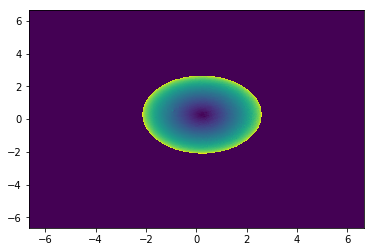

In [8]:
plt.pcolor(xv, yv, emissn_matrix)

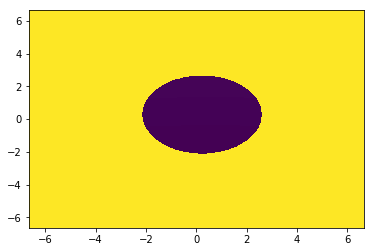

In [9]:
plt.pcolor(xv, yv, phase_matrix)